# 1. Loan Application Status Prediction
## Problem Statement:
This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. 

Independent Variables:

- Loan_ID

- Gender

- Married

- Dependents

- Education

- Self_Employed

- ApplicantIncome

- CoapplicantIncome

- Loan_Amount

- Loan_Amount_Term

- Credit History

- Property_Area

Dependent Variable (Target Variable):

- Loan_Status

You have to build a model that can predict whether the loan of the applicant will be approved or not on the basis of the details provided in the dataset. 

# 2.Import Library

In [340]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# 3.Import Dataset

In [341]:
df=pd.read_csv("loan.csv")

In [342]:
df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


# 4.Feature Description(Column) dataset

- Loan_ID: Unique Loan ID.
- Gender: Sex of Applicant.
- Married: Status of Applicant(Married:Y/N)
- Dependents: Number of dependents of Applicant
- Education: Education of Applicant
- Self_Employed: Applicant Employed status(Y/N)
- ApplicantIncome: Income of Applicant
- CoapplicantIncome: Income of Coapplicant
- LoanAmount: Loan amount in thousand(k)
- Loan_Amount_Term: Period of Loan in months
- Credit_History:Meet Criteria of credit history
- Property_Area:Type of Area of applicant property.
- Loan_Status: Loan approved(Y/N)

# 5. Shape of Dataset

In [343]:
df.shape

(614, 13)

**There are 614 rows and 13 columns in dataset.**

In [344]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

**Columns name of dataset.**

In [345]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


**Below are the observation**

- We can see there are null value in data set.

- There are 4 columns which data type is float,1 is int and 9 columns are object data type.


# 6.Statistical Summary

In [346]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


**Summary of numerical variables.**
- There is difference between mean and 50% of data value in almost all numerical columns.
- Three are missing value in loan amount,credit history.
- The max value of applicant income,coapplicantincome and Loan Amount is very high compare to 75% of dataset. 
- Coapplicant income having 0 value in minimum

# 7. Checking null value

In [347]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

**Observation of null value.**

There are 13 Gender, 3 Married,15 dependents, 32 Self employed,22 Loan amount, 14 Loan amount term and 50 data points are missing in Credit History.

# 7.1 Checking Duplicate value

In [348]:
df.duplicated().sum()

0

# 8.Seperating Numerical and Categorical Columns

In [349]:
numeric_feat=[]
categorical_feat=[]
num=["int64","float64"]
cat=["O"]
for column in df.columns:
    if df[column].dtypes in num:
        numeric_feat.append(column)
    if df[column].dtypes in cat:
        categorical_feat.append(column)

In [350]:
numeric_feat

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

In [351]:
categorical_feat

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

# 9. Exploring Categorial variable

In [352]:
category=[]
for i in categorical_feat:
    unique=df[i].value_counts()
    category.append(unique)
    category.append("***************************")
    

In [353]:
category

[LP001639    1
 LP002640    1
 LP002459    1
 LP001788    1
 LP002723    1
            ..
 LP002250    1
 LP002541    1
 LP002979    1
 LP001536    1
 LP002051    1
 Name: Loan_ID, Length: 614, dtype: int64,
 '***************************',
 Male      489
 Female    112
 Name: Gender, dtype: int64,
 '***************************',
 Yes    398
 No     213
 Name: Married, dtype: int64,
 '***************************',
 0     345
 1     102
 2     101
 3+     51
 Name: Dependents, dtype: int64,
 '***************************',
 Graduate        480
 Not Graduate    134
 Name: Education, dtype: int64,
 '***************************',
 No     500
 Yes     82
 Name: Self_Employed, dtype: int64,
 '***************************',
 Semiurban    233
 Urban        202
 Rural        179
 Name: Property_Area, dtype: int64,
 '***************************',
 Y    422
 N    192
 Name: Loan_Status, dtype: int64,
 '***************************']

**Below are the observation.**

- Loan ID is unique and having 614 different id,which may not requrire for our analysis and need to drop this columns.
- In Gender there are 2 class male and female.
- In Married feature there are 2 class Yes and No.
- In Dependents feature there are 4 category represent by 0,1,2 and more than 3(+3).
- In Education, there are 2 category Graduate and Not Graduate.
- In Self_Employed feature there are 2 class Yes and No.
- In Property Area feature there are 3 type of property area those are Urban,Rural and Semiurban.
- Loan Status is our target variable or label, which are binary in type Yes and No

# 10. Dealing with Null value in columns.

In [354]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

## 10.1 Gender columns

In [355]:
df[df["Gender"].isnull()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
23,LP001050,NaN,Yes,2,Not Graduate,No,3365,1917.0,112.0,360.0,0.0,Rural,N
126,LP001448,NaN,Yes,3+,Graduate,No,23803,0.0,370.0,360.0,1.0,Rural,Y
171,LP001585,NaN,Yes,3+,Graduate,No,51763,0.0,700.0,300.0,1.0,Urban,Y
188,LP001644,NaN,Yes,0,Graduate,Yes,674,5296.0,168.0,360.0,1.0,Rural,Y
314,LP002024,NaN,Yes,0,Graduate,No,2473,1843.0,159.0,360.0,1.0,Rural,N
334,LP002103,NaN,Yes,1,Graduate,Yes,9833,1833.0,182.0,180.0,1.0,Urban,Y
460,LP002478,NaN,Yes,0,Graduate,Yes,2083,4083.0,160.0,360.0,NaN,Semiurban,Y
467,LP002501,NaN,Yes,0,Graduate,No,16692,0.0,110.0,360.0,1.0,Semiurban,Y
477,LP002530,NaN,Yes,2,Graduate,No,2873,1872.0,132.0,360.0,0.0,Semiurban,N
507,LP002625,NaN,No,0,Graduate,No,3583,0.0,96.0,360.0,1.0,Urban,N


**We will fill nan with mode of Gender feature.**

In [356]:
mode=df["Gender"].mode()

In [357]:
df["Gender"]=df["Gender"].fillna(mode[0])

In [358]:
df["Gender"].isnull().sum()

0

## 10.2 Dealing with Married

In [359]:
df["Married"].isnull().sum()

3

In [360]:
df[df["Married"].isnull()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
104,LP001357,Male,NaN,NaN,Graduate,No,3816,754.0,160.0,360.0,1.0,Urban,Y
228,LP001760,Male,NaN,NaN,Graduate,No,4758,0.0,158.0,480.0,1.0,Semiurban,Y
435,LP002393,Female,NaN,NaN,Graduate,No,10047,0.0,NaN,240.0,1.0,Semiurban,Y


**Married feature we will fill NAN with Mode of Married feature.**

In [361]:
mode=df["Married"].mode()

In [362]:
mode

0    Yes
dtype: object

In [363]:
df["Married"]=df["Married"].fillna(mode[0])

In [364]:
df["Married"].isnull().sum()

0

## 10.3 Dealing with Dependants

In [365]:
df["Dependents"].isnull().sum()

15

In [366]:
df[df["Dependents"].isnull()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
102,LP001350,Male,Yes,NaN,Graduate,No,13650,0.0,NaN,360.0,1.0,Urban,Y
104,LP001357,Male,Yes,NaN,Graduate,No,3816,754.0,160.0,360.0,1.0,Urban,Y
120,LP001426,Male,Yes,NaN,Graduate,No,5667,2667.0,180.0,360.0,1.0,Rural,Y
226,LP001754,Male,Yes,NaN,Not Graduate,Yes,4735,0.0,138.0,360.0,1.0,Urban,N
228,LP001760,Male,Yes,NaN,Graduate,No,4758,0.0,158.0,480.0,1.0,Semiurban,Y
293,LP001945,Female,No,NaN,Graduate,No,5417,0.0,143.0,480.0,0.0,Urban,N
301,LP001972,Male,Yes,NaN,Not Graduate,No,2875,1750.0,105.0,360.0,1.0,Semiurban,Y
332,LP002100,Male,No,NaN,Graduate,No,2833,0.0,71.0,360.0,1.0,Urban,Y
335,LP002106,Male,Yes,NaN,Graduate,Yes,5503,4490.0,70.0,NaN,1.0,Semiurban,Y
346,LP002130,Male,Yes,NaN,Not Graduate,No,3523,3230.0,152.0,360.0,0.0,Rural,N


**We will fill null value of  Dependant variable with mode of Dependant variable.**

In [367]:
mode=df["Dependents"].mode()

In [368]:
df["Dependents"]=df["Dependents"].fillna(mode[0])

In [369]:
df["Dependents"].isnull().sum()

0

## 10.4 Dealing with self Employed feature

In [370]:
df["Self_Employed"].isnull().sum()

32

In [371]:
df[df["Self_Employed"].isnull()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
11,LP001027,Male,Yes,2,Graduate,NaN,2500,1840.0,109.0,360.0,1.0,Urban,Y
19,LP001041,Male,Yes,0,Graduate,NaN,2600,3500.0,115.0,NaN,1.0,Urban,Y
24,LP001052,Male,Yes,1,Graduate,NaN,3717,2925.0,151.0,360.0,NaN,Semiurban,N
29,LP001087,Female,No,2,Graduate,NaN,3750,2083.0,120.0,360.0,1.0,Semiurban,Y
30,LP001091,Male,Yes,1,Graduate,NaN,4166,3369.0,201.0,360.0,NaN,Urban,N
95,LP001326,Male,No,0,Graduate,NaN,6782,0.0,NaN,360.0,NaN,Urban,N
107,LP001370,Male,No,0,Not Graduate,NaN,7333,0.0,120.0,360.0,1.0,Rural,N
111,LP001387,Female,Yes,0,Graduate,NaN,2929,2333.0,139.0,360.0,1.0,Semiurban,Y
114,LP001398,Male,No,0,Graduate,NaN,5050,0.0,118.0,360.0,1.0,Semiurban,Y
158,LP001546,Male,No,0,Graduate,NaN,2980,2083.0,120.0,360.0,1.0,Rural,Y


**We will fill na for self employed feature with their mode value.**

In [372]:
mode=df["Self_Employed"].mode()

In [373]:
df["Self_Employed"]=df["Self_Employed"].fillna(mode[0])

In [374]:
df["Self_Employed"].isnull().sum()

0

## 10.5 Dealing with Loan Amount

In [375]:
df["LoanAmount"].isnull().sum()

22

In [376]:
df[df["LoanAmount"].isnull()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
35,LP001106,Male,Yes,0,Graduate,No,2275,2067.0,NaN,360.0,1.0,Urban,Y
63,LP001213,Male,Yes,1,Graduate,No,4945,0.0,NaN,360.0,0.0,Rural,N
81,LP001266,Male,Yes,1,Graduate,Yes,2395,0.0,NaN,360.0,1.0,Semiurban,Y
95,LP001326,Male,No,0,Graduate,No,6782,0.0,NaN,360.0,NaN,Urban,N
102,LP001350,Male,Yes,0,Graduate,No,13650,0.0,NaN,360.0,1.0,Urban,Y
103,LP001356,Male,Yes,0,Graduate,No,4652,3583.0,NaN,360.0,1.0,Semiurban,Y
113,LP001392,Female,No,1,Graduate,Yes,7451,0.0,NaN,360.0,1.0,Semiurban,Y
127,LP001449,Male,No,0,Graduate,No,3865,1640.0,NaN,360.0,1.0,Rural,Y
202,LP001682,Male,Yes,3+,Not Graduate,No,3992,0.0,NaN,180.0,1.0,Urban,N


**We will fill na value of Loan amount with mean value of loan amount.** 

In [377]:
mean=df["LoanAmount"].mean()

In [378]:
mean

146.41216216216216

In [379]:
df["LoanAmount"]=df["LoanAmount"].fillna(mean)

In [380]:
df["LoanAmount"].isnull().sum()

0

## 10.6 Dealing with Loan Amount Term feature

In [381]:
df["Loan_Amount_Term"].isnull().sum()

14

In [382]:
df[df["Loan_Amount_Term"].isnull()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
19,LP001041,Male,Yes,0,Graduate,No,2600,3500.0,115.0,NaN,1.0,Urban,Y
36,LP001109,Male,Yes,0,Graduate,No,1828,1330.0,100.0,NaN,0.0,Urban,N
44,LP001136,Male,Yes,0,Not Graduate,Yes,4695,0.0,96.0,NaN,1.0,Urban,Y
45,LP001137,Female,No,0,Graduate,No,3410,0.0,88.0,NaN,1.0,Urban,Y
73,LP001250,Male,Yes,3+,Not Graduate,No,4755,0.0,95.0,NaN,0.0,Semiurban,N
112,LP001391,Male,Yes,0,Not Graduate,No,3572,4114.0,152.0,NaN,0.0,Rural,N
165,LP001574,Male,Yes,0,Graduate,No,3707,3166.0,182.0,NaN,1.0,Rural,Y
197,LP001669,Female,No,0,Not Graduate,No,1907,2365.0,120.0,NaN,1.0,Urban,Y
223,LP001749,Male,Yes,0,Graduate,No,7578,1010.0,175.0,NaN,1.0,Semiurban,Y
232,LP001770,Male,No,0,Not Graduate,No,3189,2598.0,120.0,NaN,1.0,Rural,Y


**We will fill null value of loan amount term with the mean value of loan amount term.**

In [383]:
mean=df["Loan_Amount_Term"].mean()

In [384]:
mean

342.0

In [385]:
df["Loan_Amount_Term"]=df["Loan_Amount_Term"].fillna(mean)

In [386]:
df["Loan_Amount_Term"].isnull().sum()

0

## 10.7 Dealing with Credit history

In [387]:
df["Credit_History"].isnull().sum()

50

In [388]:
df[df["Credit_History"].isnull()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
16,LP001034,Male,No,1,Not Graduate,No,3596,0.0,100.000000,240.0,NaN,Urban,Y
24,LP001052,Male,Yes,1,Graduate,No,3717,2925.0,151.000000,360.0,NaN,Semiurban,N
30,LP001091,Male,Yes,1,Graduate,No,4166,3369.0,201.000000,360.0,NaN,Urban,N
42,LP001123,Male,Yes,0,Graduate,No,2400,0.0,75.000000,360.0,NaN,Urban,Y
79,LP001264,Male,Yes,3+,Not Graduate,Yes,3333,2166.0,130.000000,360.0,NaN,Semiurban,Y
83,LP001273,Male,Yes,0,Graduate,No,6000,2250.0,265.000000,360.0,NaN,Semiurban,N
86,LP001280,Male,Yes,2,Not Graduate,No,3333,2000.0,99.000000,360.0,NaN,Semiurban,Y
95,LP001326,Male,No,0,Graduate,No,6782,0.0,146.412162,360.0,NaN,Urban,N
117,LP001405,Male,Yes,1,Graduate,No,2214,1398.0,85.000000,360.0,NaN,Urban,Y
125,LP001443,Female,No,0,Graduate,No,3692,0.0,93.000000,360.0,NaN,Rural,Y


**We have credit history class is either 0 or 1 which represent the meeting criteria or guideline of credit or not. 0 represent no and 1 is yes. So we will fill na value of credit history with the mode of credit history.**

In [389]:
mode=df["Credit_History"].mode()

In [390]:
mode

0    1.0
dtype: float64

In [391]:
df["Credit_History"]=df["Credit_History"].fillna(mode[0])

In [392]:
df["Credit_History"].isnull().sum()

0

In [393]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

**To confirm this that there are no more no null value in dataset.**

## 10.8 Dealing with zero value in CoapplicantIncome feature

In [394]:
df[df["CoapplicantIncome"]==0]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
15,LP001032,Male,No,0,Graduate,No,4950,0.0,125.000000,360.0,1.0,Urban,Y
16,LP001034,Male,No,1,Not Graduate,No,3596,0.0,100.000000,240.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
604,LP002959,Female,Yes,1,Graduate,No,12000,0.0,496.000000,360.0,1.0,Semiurban,Y
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y


** we will fill zero value coapplicant income with the mean value of coapplicant income.**

In [395]:
df[df["CoapplicantIncome"]==0].index

Int64Index([  0,   2,   4,  15,  16,  17,  18,  20,  25,  28,
            ...
            595, 597, 598, 599, 602, 604, 609, 610, 612, 613],
           dtype='int64', length=273)

In [396]:
mean=df["CoapplicantIncome"].mean()

In [397]:
df["CoapplicantIncome"].replace(to_replace=0,value=mean,inplace=True)

In [398]:
df[df["CoapplicantIncome"]==0]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status


# 11. Exploratory Data Analysis

## 11.1 Univariate Analysis

In [399]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

**As we know that Loan ID is having unique id number which will not have any impact on our loan status prediction,so we will drop this.**

In [400]:
df.drop("Loan_ID",axis=1,inplace=True)

### 11.1.1 Gender feature

<AxesSubplot:xlabel='Gender', ylabel='count'>

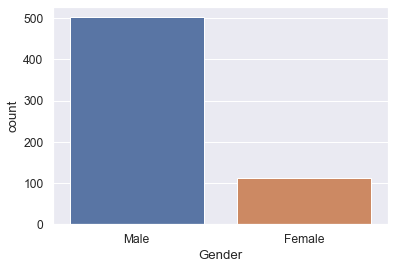

In [401]:
sns.countplot(df["Gender"])

In [402]:
print("Gender count in number")
print(df["Gender"].value_counts())
print("\n*************************************************")
print("\nGender count in percentage")
print(df["Gender"].value_counts(normalize=True))

Gender count in number
Male      502
Female    112
Name: Gender, dtype: int64

*************************************************

Gender count in percentage
Male      0.81759
Female    0.18241
Name: Gender, dtype: float64


### 11.1.2 Married

<AxesSubplot:xlabel='Married', ylabel='count'>

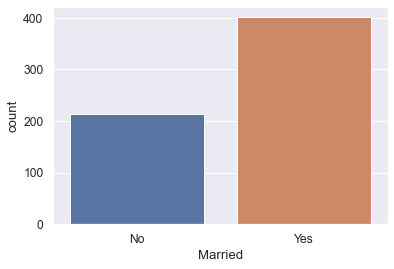

In [403]:
sns.countplot(df["Married"])

In [404]:
print("Married count in number")
print(df["Married"].value_counts())
print("\n*************************************************")
print("\nMarried count in percentage")
print(df["Married"].value_counts(normalize=True))

Married count in number
Yes    401
No     213
Name: Married, dtype: int64

*************************************************

Married count in percentage
Yes    0.653094
No     0.346906
Name: Married, dtype: float64


### 11.1.3 Dependents

<AxesSubplot:xlabel='Dependents', ylabel='count'>

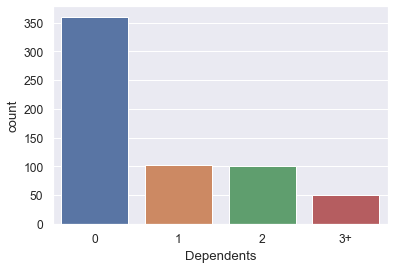

In [405]:
sns.countplot(df["Dependents"])

In [406]:
print("Dependents count in number")
print(df["Dependents"].value_counts())
print("\n*************************************************")
print("\nDependents count in percentage")
print(df["Dependents"].value_counts(normalize=True))

Dependents count in number
0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64

*************************************************

Dependents count in percentage
0     0.586319
1     0.166124
2     0.164495
3+    0.083062
Name: Dependents, dtype: float64


### 11.1.4 Education

<AxesSubplot:xlabel='Education', ylabel='count'>

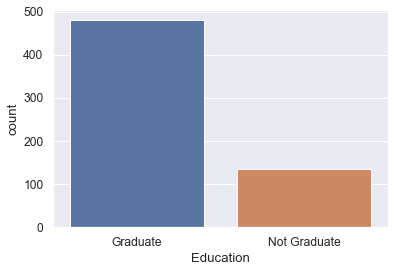

In [407]:
sns.countplot(df["Education"])

In [408]:
print("Education count in number")
print(df["Education"].value_counts())
print("\n*************************************************")
print("\nEducation count in percentage")
print(df["Education"].value_counts(normalize=True))

Education count in number
Graduate        480
Not Graduate    134
Name: Education, dtype: int64

*************************************************

Education count in percentage
Graduate        0.781759
Not Graduate    0.218241
Name: Education, dtype: float64


### 11.1.5 Self Employed

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

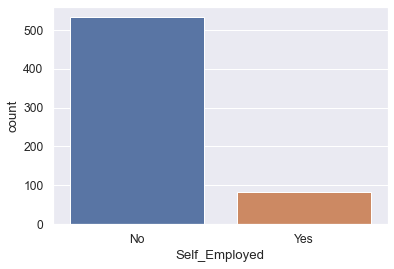

In [409]:
sns.countplot(df["Self_Employed"])

In [410]:
print("Self Employed count in number")
print(df["Self_Employed"].value_counts())
print("\n*************************************************")
print("\nSelf Employed count in percentage")
print(df["Self_Employed"].value_counts(normalize=True))

Self Employed count in number
No     532
Yes     82
Name: Self_Employed, dtype: int64

*************************************************

Self Employed count in percentage
No     0.86645
Yes    0.13355
Name: Self_Employed, dtype: float64


### 11.1.6 Applicant Income

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

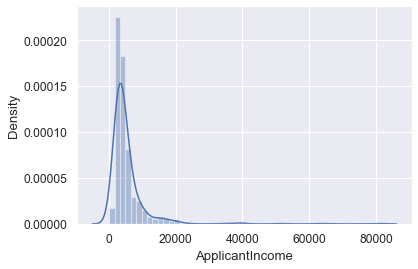

In [411]:
sns.distplot(df["ApplicantIncome"])

**As we can see there are outlier in applicant income.**

### 11.1.7 Coapplicant Income

<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Density'>

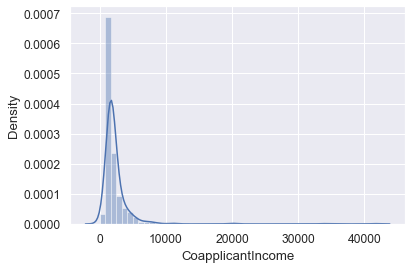

In [412]:
sns.distplot(df["CoapplicantIncome"])

**In above plot Coapplicantincome having outliers.**

### 11.1.8 Loan Amount

<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

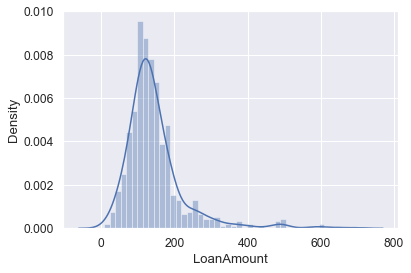

In [413]:
sns.distplot(df["LoanAmount"])

**Loan Amount data distribution is normal distribution and having some outliers.**

### 11.1.9 Loan Amount Term

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='Density'>

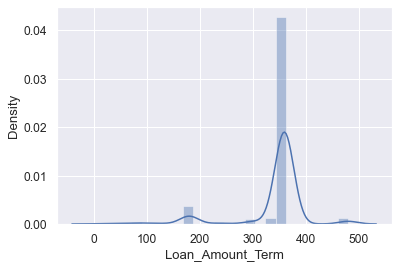

In [414]:
sns.distplot(df["Loan_Amount_Term"])

**Data is look like normal distribution but having outliers.**

### 11.1.10 Credit History

<AxesSubplot:xlabel='Credit_History', ylabel='Density'>

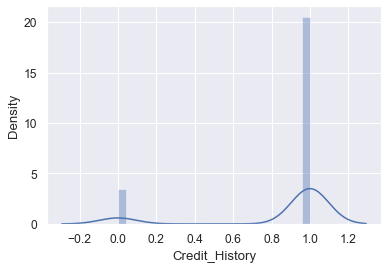

In [415]:
sns.distplot(df["Credit_History"])

**Data looks like normal distribution.**

### 11.1.11 Property Area

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

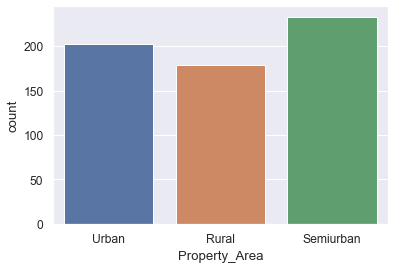

In [416]:
sns.countplot(df["Property_Area"])

In [417]:
print("Property Area count in number")
print(df["Property_Area"].value_counts())
print("\n*************************************************")
print("\nProperty Area count in percentage")
print(df["Property_Area"].value_counts(normalize=True))

Property Area count in number
Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

*************************************************

Property Area count in percentage
Semiurban    0.379479
Urban        0.328990
Rural        0.291531
Name: Property_Area, dtype: float64


### 11.1.12 Loan Status

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

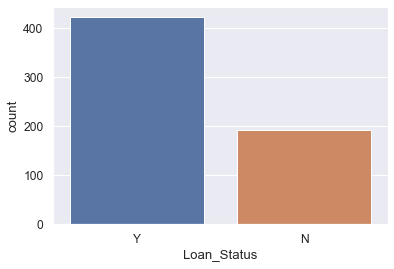

In [418]:
sns.countplot(df["Loan_Status"])

In [419]:
print("Loan Status count in number")
print(df["Loan_Status"].value_counts())
print("\n*************************************************")
print("\nLoan Status count in percentage")
print(df["Loan_Status"].value_counts(normalize=True))

Loan Status count in number
Y    422
N    192
Name: Loan_Status, dtype: int64

*************************************************

Loan Status count in percentage
Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64


**This is our target variable and we can infer from plot that data is not inbalanced.**

## 11.2 Bivariate Analysis

### 11.2.1 Gender Vs Applicant Income

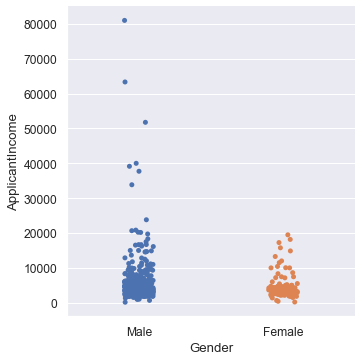

In [420]:
sns.catplot(x="Gender",y="ApplicantIncome",data=df)

**Observation:**

- We can infer from the above plot that the more male category are in applicant income.
- Maximum people income is below 10000 who applied for loan.
- There are also high income in male for loan application but the number is very few.

### 11.2.2 Gender Vs CoapplicantIncome

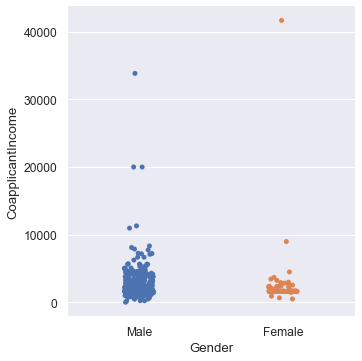

In [421]:
sns.catplot(x="Gender",y="CoapplicantIncome",data=df)

**Observation:**
- Maximum Coapplicant income is lesser than 10000 in male category 
- Maximum Coapplicant income is lesser than 5000 in female category.
- There are very few high income in male and female category, which are outlier.

### 11.2.3 Gender Vs Loan Amount

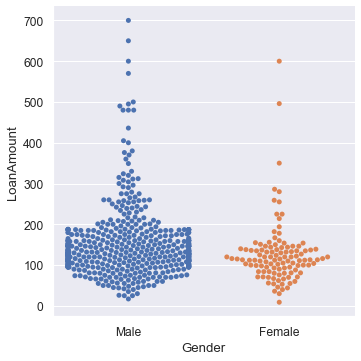

In [422]:
sns.catplot(x="Gender",y="LoanAmount",data=df,kind="swarm")

**Observation:**
- Maximum applicant loan was sanction between the range of 1 lakh to 2 lakh who are male.
- For female applicant maximum applicant loan has sanctioned below 2 lakh.
- In both male and female having some high value of loan sanctioned.
- Here it can be easily infer that if applicant is male then the chances of getting more loan amount than female.


### 11.2.4 Married Vs LoanAmount

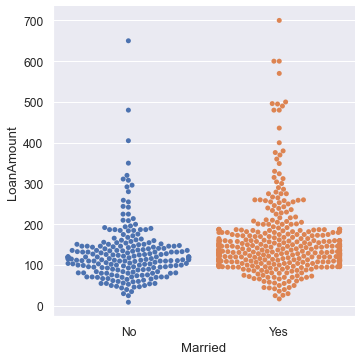

In [423]:
sns.catplot(x="Married",y="LoanAmount",data=df,kind="swarm")

**Observation.**
- We can infer that maximum applicant loan amount is more who is married compare to unmarried applicant
- There are also high amount of loan in married applicant, this could be becuase of more financial commitment for married comapre to unmarried applicant.

### 11.2.5 Married Vs Loan Amount Term

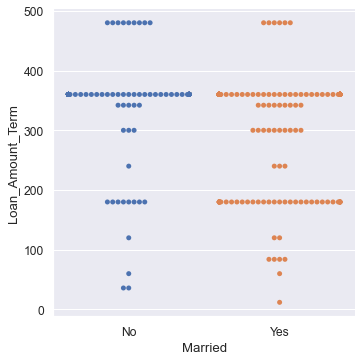

In [424]:
sns.catplot(x="Married",y="Loan_Amount_Term",data=df,kind="swarm")

**Observation.**
- The term of loan amount is maximum for applicant in range of 300 to 400 months .
- Within 200 months of term, maximum applicant is married than unmarried.

### 11.2.6 Dependents Vs Loan Amount

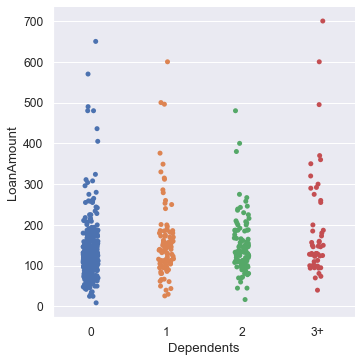

In [425]:
sns.catplot(x="Dependents",y="LoanAmount",data=df)

**Observation.**
- Maximum applicant of loan are 0 dependents which infer that the chances of sanctioned loan is more if applicant with 0 or less dependents.

### 11.2.7 Education Vs Loan Amount

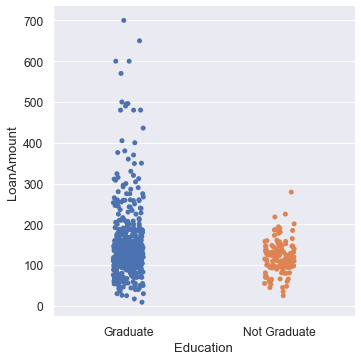

In [426]:
sns.catplot(x="Education",y="LoanAmount",data=df)

**Observation:**
- If the applicant is graduate the loan amount sanctioned more compare to not graduate applicant.
- More than 3 lakh amount of loan given only for graduate applicant.

### 11.2.8 Self Employed VS Loan Amount

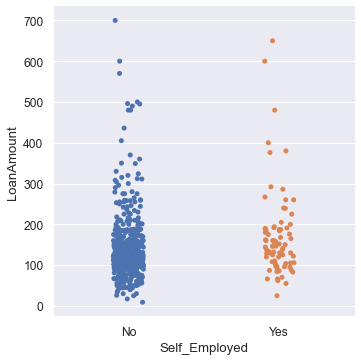

In [427]:
sns.catplot(x="Self_Employed",y="LoanAmount",data=df)

**Observation**
- Obviously for self employed category applicant loan has sanctioned very less with lesser amount.
- There are also some high value of loan amount in self employed applicant, these could be like business man who running their bussiness sucessfully.
- We can also infer that the need of loan is more in employed applicant then self applicant.

### 11.2.9 Gender VS Loan Status

<AxesSubplot:xlabel='Gender', ylabel='Count'>

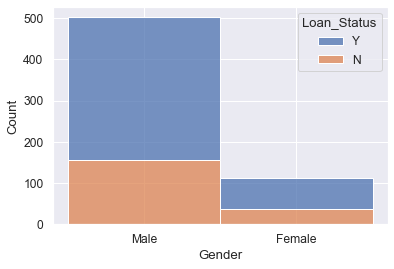

In [428]:
sns.histplot(x="Gender",hue="Loan_Status",data=df,multiple="stack")

**Observation**
- As we can infer from above plot that male and female having equal chances of getting loan approved.

### 11.2.10 Married Vs Loan Status

<AxesSubplot:xlabel='Married', ylabel='Count'>

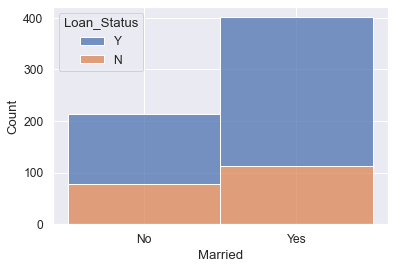

In [429]:
sns.histplot(x="Married",hue="Loan_Status",data=df,multiple="stack")

**Observation**
- We can see from above plot that Married applicant have slightly higher chance of loan approval.

### 11.2.11 Dependents vs Loan Status

<AxesSubplot:xlabel='Dependents', ylabel='Count'>

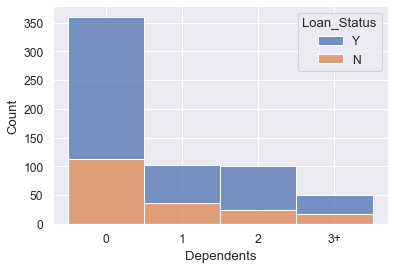

In [430]:
sns.histplot(x="Dependents",hue="Loan_Status",data=df,multiple="stack")

**Observation**
- Applicant with 0 or 2 dependents having high chances of approval comapre to 1 or more than 3.

### 11.2.12 Education Vs Loan Status

<AxesSubplot:xlabel='Education', ylabel='Count'>

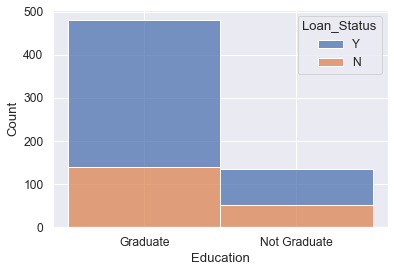

In [431]:
sns.histplot(x="Education",hue="Loan_Status",data=df,multiple="stack")

**Observation**
- We can infer from above table that Rejection of loan is lesser in Graduate applicant than not graduate applicant.

### 11.2.13 Self Employed VS Loan status

<AxesSubplot:xlabel='Self_Employed', ylabel='Count'>

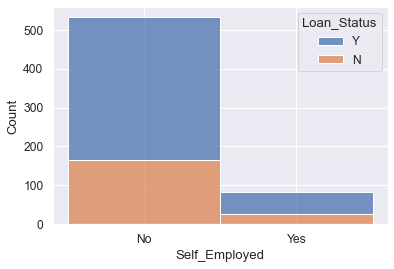

In [432]:
sns.histplot(x="Self_Employed",hue="Loan_Status",data=df,multiple="stack")

**Observation**
- We can infer from above plot that self employed and not self employed having equal chances of getting loan approval.

### 11.2.14 Credit History VS Loan Status

<AxesSubplot:xlabel='Credit_History', ylabel='Count'>

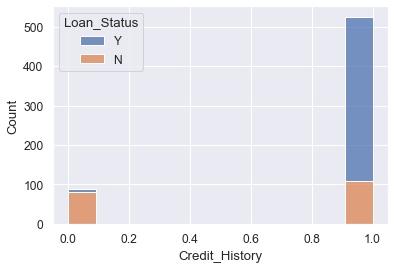

In [433]:
sns.histplot(x="Credit_History",hue="Loan_Status",data=df,multiple="stack")

**Observation**
- we can analyse from above plot that with 0 credit history also little chances of getting loan approval.

### 11.2.15 Property Area VS Loan Status

<AxesSubplot:xlabel='Property_Area', ylabel='Count'>

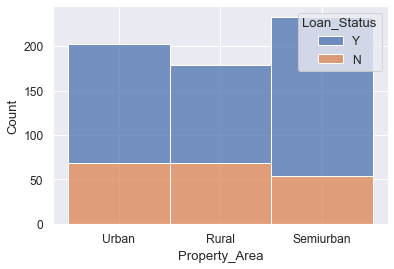

In [434]:
sns.histplot(x="Property_Area",hue="Loan_Status",data=df,multiple="stack")

**Observation**
- We can infer that in Urban and Semiurban type of property the loan decline chances is less.
- Semiurban having high chances of loan approval than other.`

## 11.3 Multivariate Analysis

### 11.3.1 Property Area VS Loan Amount Vs Loan Status

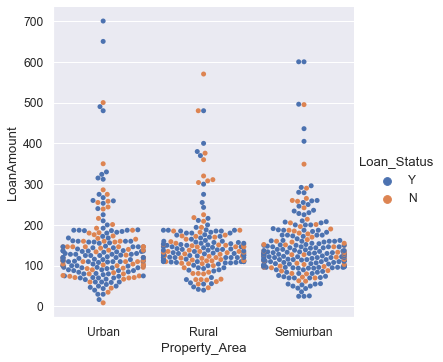

In [435]:
sns.catplot(x="Property_Area",y="LoanAmount",hue="Loan_Status",data=df,kind="swarm")

**Observation**
- Loan has approved for property type semiurban applicant compare to urban and rular.


### 11.3.2 Dependents VS LoanAmount VS Loan_Status

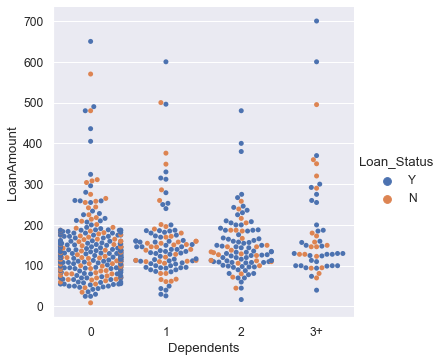

In [436]:
sns.catplot(x="Dependents",y="LoanAmount",hue="Loan_Status",data=df,kind="swarm")

**Observation**
- Maximum rejection in loan request of applicant where they have one dependent compare to others.
- Minimum rejection in loan request of applicant where they have two dependent it would me spouse and son or daughter who dependent on applicant.

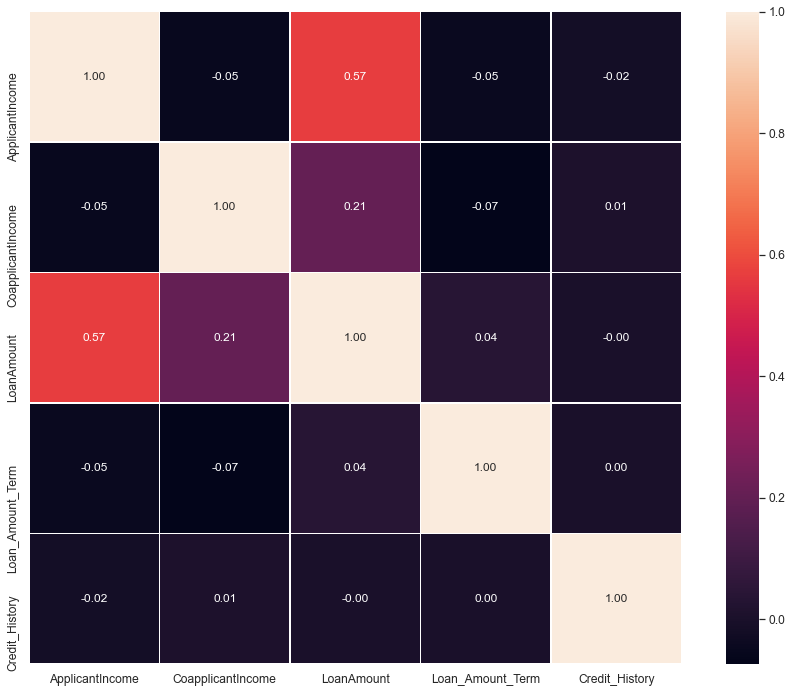

In [437]:
plt.subplots(figsize=(16,12))
cm=np.corrcoef(df[numeric_feat].values.T)
sns.set(font_scale=1.1)
heatmap=sns.heatmap(cm,cbar = True, annot = True,square = True, fmt = '.2f', annot_kws = {'size':12}, yticklabels = numeric_feat, xticklabels = numeric_feat,linewidths=.5)

**Observation**
- Loan Amount and applicantincome have little high correleation compare to others.
- Loan Amount and coapplicantincome also have little high correleation compare to others features.

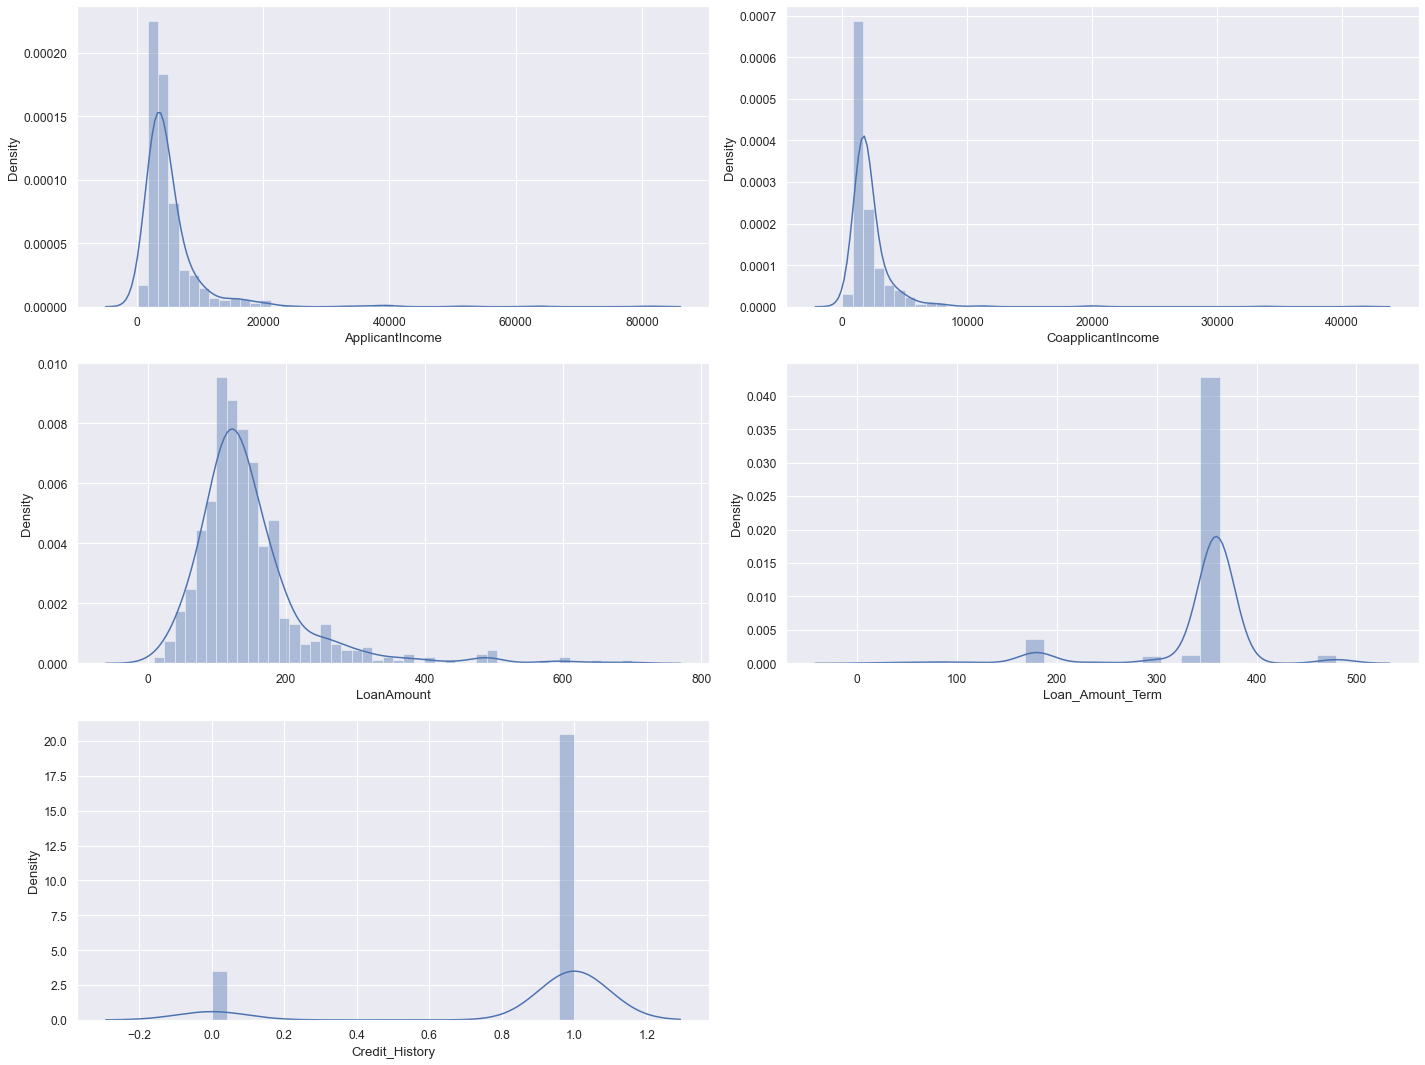

In [438]:
plt.figure(figsize=(20,15),facecolor="white")
plotnumber=1
for column in numeric_feat:
    if plotnumber <=6:
        ax=plt.subplot(3,2,plotnumber)
        sns.distplot(df[column])
    plotnumber+=1
plt.tight_layout()

**Observation**
- Data looks like normal distribution but having some outliers.
- Applicantincome,Coapplicantincome and loan amount having right skeweed data.
- Loan amount term having left side skeweed data.

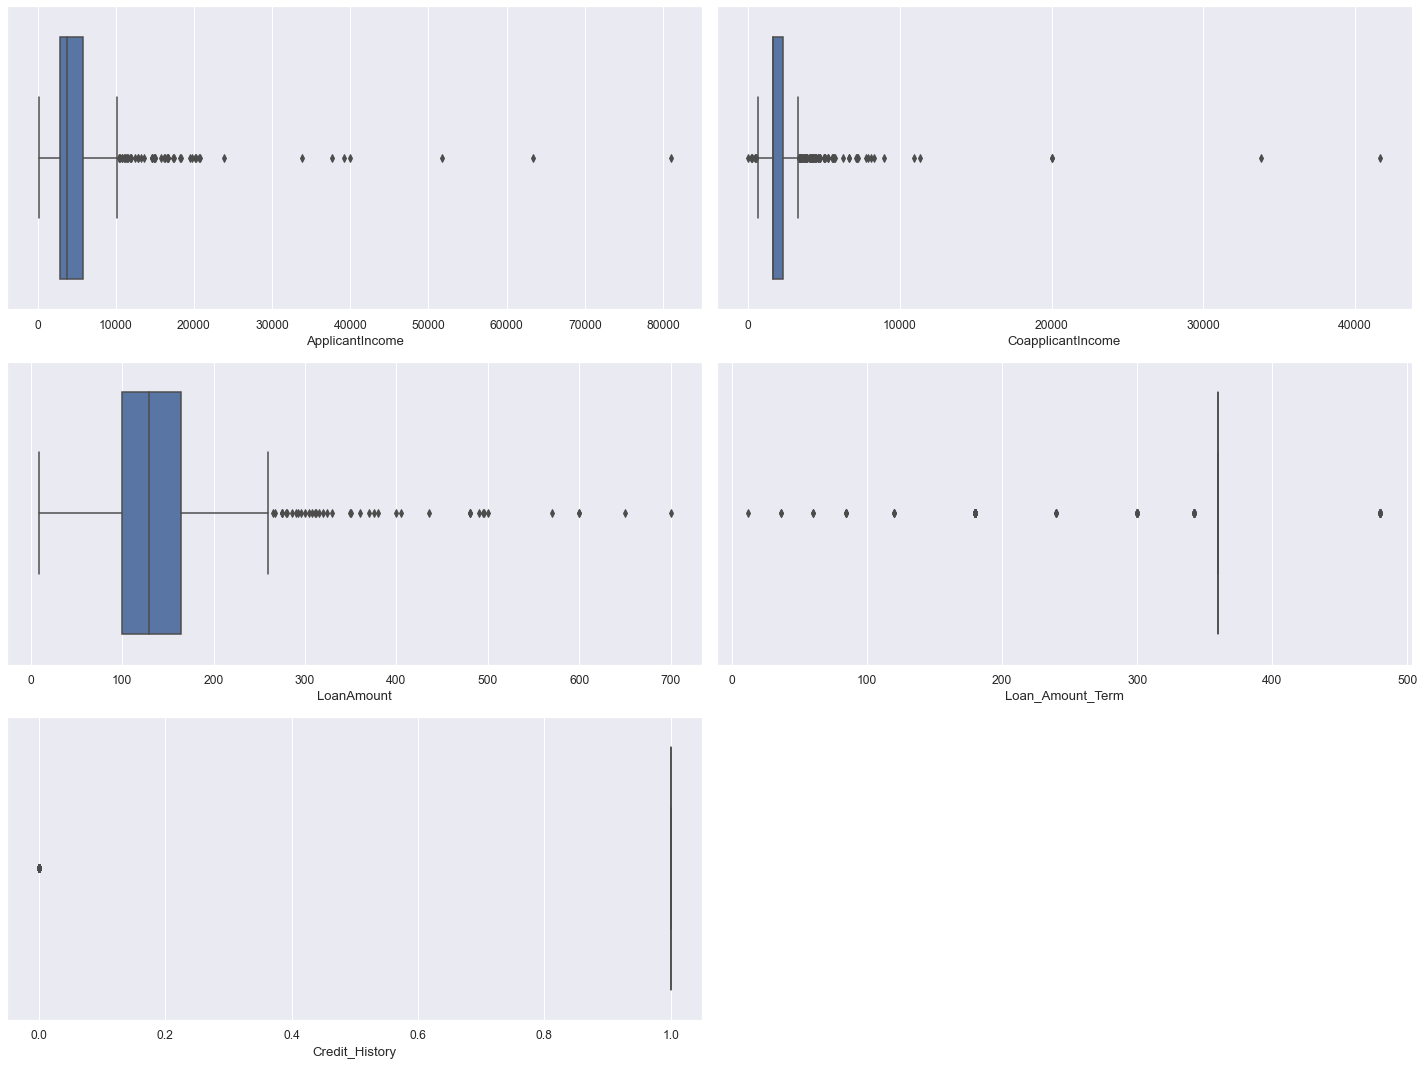

In [439]:
plt.figure(figsize=(20,15),facecolor="white")
plotnumber=1
for column in numeric_feat:
    if plotnumber <=6:
        ax=plt.subplot(3,2,plotnumber)
        sns.boxplot(df[column])
    plotnumber+=1
plt.tight_layout()

**Observation**
- We can infer from the above plot that our numerial features having many outliers, due to which data also skeewed.

# 12.Feature Engineering

**We will convert our categorical feature into numcerical for our model.**

In [440]:
categorical_feat

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

In [441]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

## 12.1 Dealing with Gender features(Applying Label Encoder)

In [442]:
df["Gender"].value_counts()

Male      502
Female    112
Name: Gender, dtype: int64

**In gender there are two class Male and Female, so we will applying Label Encoding technique.**

In [443]:
from sklearn.preprocessing import LabelEncoder

In [444]:
lab_enc=LabelEncoder()

In [445]:
z=lab_enc.fit_transform(df.Gender.values.reshape(-1,1))

In [446]:
df["Gender"]=z

In [447]:
df["Gender"].value_counts()

1    502
0    112
Name: Gender, dtype: int64

## 12.2 Dealing with Married features(Applying Label Encoder)

In [448]:
df["Married"].value_counts()

Yes    401
No     213
Name: Married, dtype: int64

In [449]:
lab_enc=LabelEncoder()

In [450]:
z=lab_enc.fit_transform(df.Married.values.reshape(-1,1))

In [451]:
df["Married"]=z

In [452]:
df["Married"].value_counts()

1    401
0    213
Name: Married, dtype: int64

## 12.3 Dealing with Dependents feature (Apply Ordinal Encoder)

In [453]:
df["Dependents"].value_counts()

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [454]:
from sklearn.preprocessing import OrdinalEncoder

In [455]:
enc=OrdinalEncoder(categories=[["3+","2","1","0"]])

In [456]:
z=enc.fit_transform(df.Dependents.values.reshape(-1,1))

In [457]:
df["Dependents"]=z

In [458]:
df["Dependents"].value_counts()

3.0    360
2.0    102
1.0    101
0.0     51
Name: Dependents, dtype: int64

## 12.4 Dealing with Education feature (Apply Ordinal Encoder)

In [459]:
df["Education"].value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

In [460]:
enc=OrdinalEncoder(categories=[["Not Graduate","Graduate"]])

In [461]:
z=enc.fit_transform(df.Education.values.reshape(-1,1))

In [462]:
df["Education"]=z

In [463]:
df["Education"].value_counts()

1.0    480
0.0    134
Name: Education, dtype: int64

## 12.4 Dealing with Self_Employed feature (Apply Ordinal Encoder)

In [464]:
df["Self_Employed"].value_counts()

No     532
Yes     82
Name: Self_Employed, dtype: int64

In [465]:
enc=OrdinalEncoder(categories=[["Yes","No"]])

In [466]:
z=enc.fit_transform(df.Self_Employed.values.reshape(-1,1))

In [467]:
df["Self_Employed"]=z

In [468]:
df["Self_Employed"].value_counts()

1.0    532
0.0     82
Name: Self_Employed, dtype: int64

## 12.5 Dealing with Property Area (Applying Onehot Encoder)

In [469]:
df["Property_Area"].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [470]:
from sklearn.preprocessing import OneHotEncoder

In [471]:
onehotencoder=OneHotEncoder()

In [472]:
x=onehotencoder.fit_transform(df.Property_Area.values.reshape(-1,1)).toarray()

In [473]:
j=df["Property_Area"].value_counts()

In [474]:
dfOnehot=pd.DataFrame(x,columns=["Property_Area_"+str(i) for i in j.index])

In [475]:
df=pd.concat([df,dfOnehot],axis=1)

In [476]:
df.shape

(614, 15)

In [477]:
df.drop("Property_Area",axis=1,inplace=True)

In [478]:
df.shape

(614, 14)

# 13. Dealing with Target/Label 

In [479]:
df["Loan_Status"].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [480]:
df["Loan_Status"]=df["Loan_Status"].replace(to_replace="Y",value=0)

In [481]:
df["Loan_Status"]=df["Loan_Status"].replace(to_replace="N",value=1)

In [482]:
df["Loan_Status"].value_counts()

0    422
1    192
Name: Loan_Status, dtype: int64

In [483]:
print("Loan Status count in number")
print(df["Loan_Status"].value_counts())
print("\n*************************************************")
print("\nLoan Status count in percentage")
print(df["Loan_Status"].value_counts(normalize=True))

Loan Status count in number
0    422
1    192
Name: Loan_Status, dtype: int64

*************************************************

Loan Status count in percentage
0    0.687296
1    0.312704
Name: Loan_Status, dtype: float64


**As we can see target variable is not balanced, so model might predict more yes.Hence we will treat for Data Inbalanced.**

## 13.1 Treating Data Inbalanced for Target Variable

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

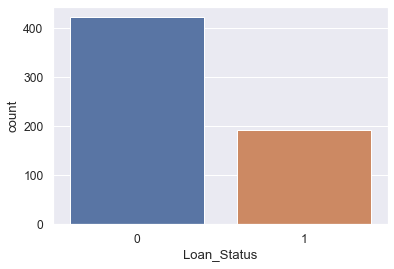

In [484]:
sns.countplot(df["Loan_Status"])

In [485]:
class_count_0,class_count_1=df["Loan_Status"].value_counts()

In [486]:
#Seperate class
class_0=df[df["Loan_Status"]==0]
class_1=df[df["Loan_Status"]==1]

In [487]:
print("class 0:",class_0.shape)
print("class 1:",class_1.shape)

class 0: (422, 14)
class 1: (192, 14)


**Here we will use oversampling method becuase undersampling would remove lot of rows which could lead to loss of information.**

In [488]:
class_1_over=class_1.sample(class_count_0,replace=True)
test_over=pd.concat([class_1_over,class_0],axis=0)
print("total class of 1 and 0:",test_over["Loan_Status"].value_counts())

total class of 1 and 0: 0    422
1    422
Name: Loan_Status, dtype: int64


In [489]:
df=pd.DataFrame(test_over)

<AxesSubplot:title={'center':'count(target)'}>

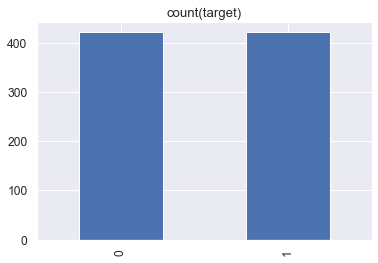

In [490]:
test_over["Loan_Status"].value_counts().plot(kind="bar",title="count(target)")

In [491]:
df["Loan_Status"].value_counts()

0    422
1    422
Name: Loan_Status, dtype: int64

In [492]:
df.shape

(844, 14)

In [493]:
df.reset_index(drop=True,inplace=True)

In [494]:
df.shape

(844, 14)

In [495]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Property_Area_Semiurban,Property_Area_Urban,Property_Area_Rural
0,1,1,3.0,0.0,1.0,3523,3230.000000,152.0,360.0,0.0,1,1.0,0.0,0.0
1,1,1,1.0,1.0,1.0,4566,1621.245798,100.0,360.0,1.0,1,0.0,0.0,1.0
2,1,0,3.0,1.0,1.0,2237,1621.245798,63.0,480.0,0.0,1,0.0,1.0,0.0
3,1,1,3.0,0.0,1.0,1668,3890.000000,201.0,360.0,0.0,1,0.0,1.0,0.0
4,1,0,2.0,1.0,1.0,3062,1987.000000,111.0,180.0,0.0,1,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
839,1,1,3.0,1.0,1.0,3232,1950.000000,108.0,360.0,1.0,0,1.0,0.0,0.0
840,0,0,3.0,1.0,1.0,2900,1621.245798,71.0,360.0,1.0,0,1.0,0.0,0.0
841,1,1,0.0,1.0,1.0,4106,1621.245798,40.0,180.0,1.0,0,1.0,0.0,0.0
842,1,1,2.0,1.0,1.0,8072,240.000000,253.0,360.0,1.0,0,0.0,0.0,1.0


# 12. Checking with Outliers

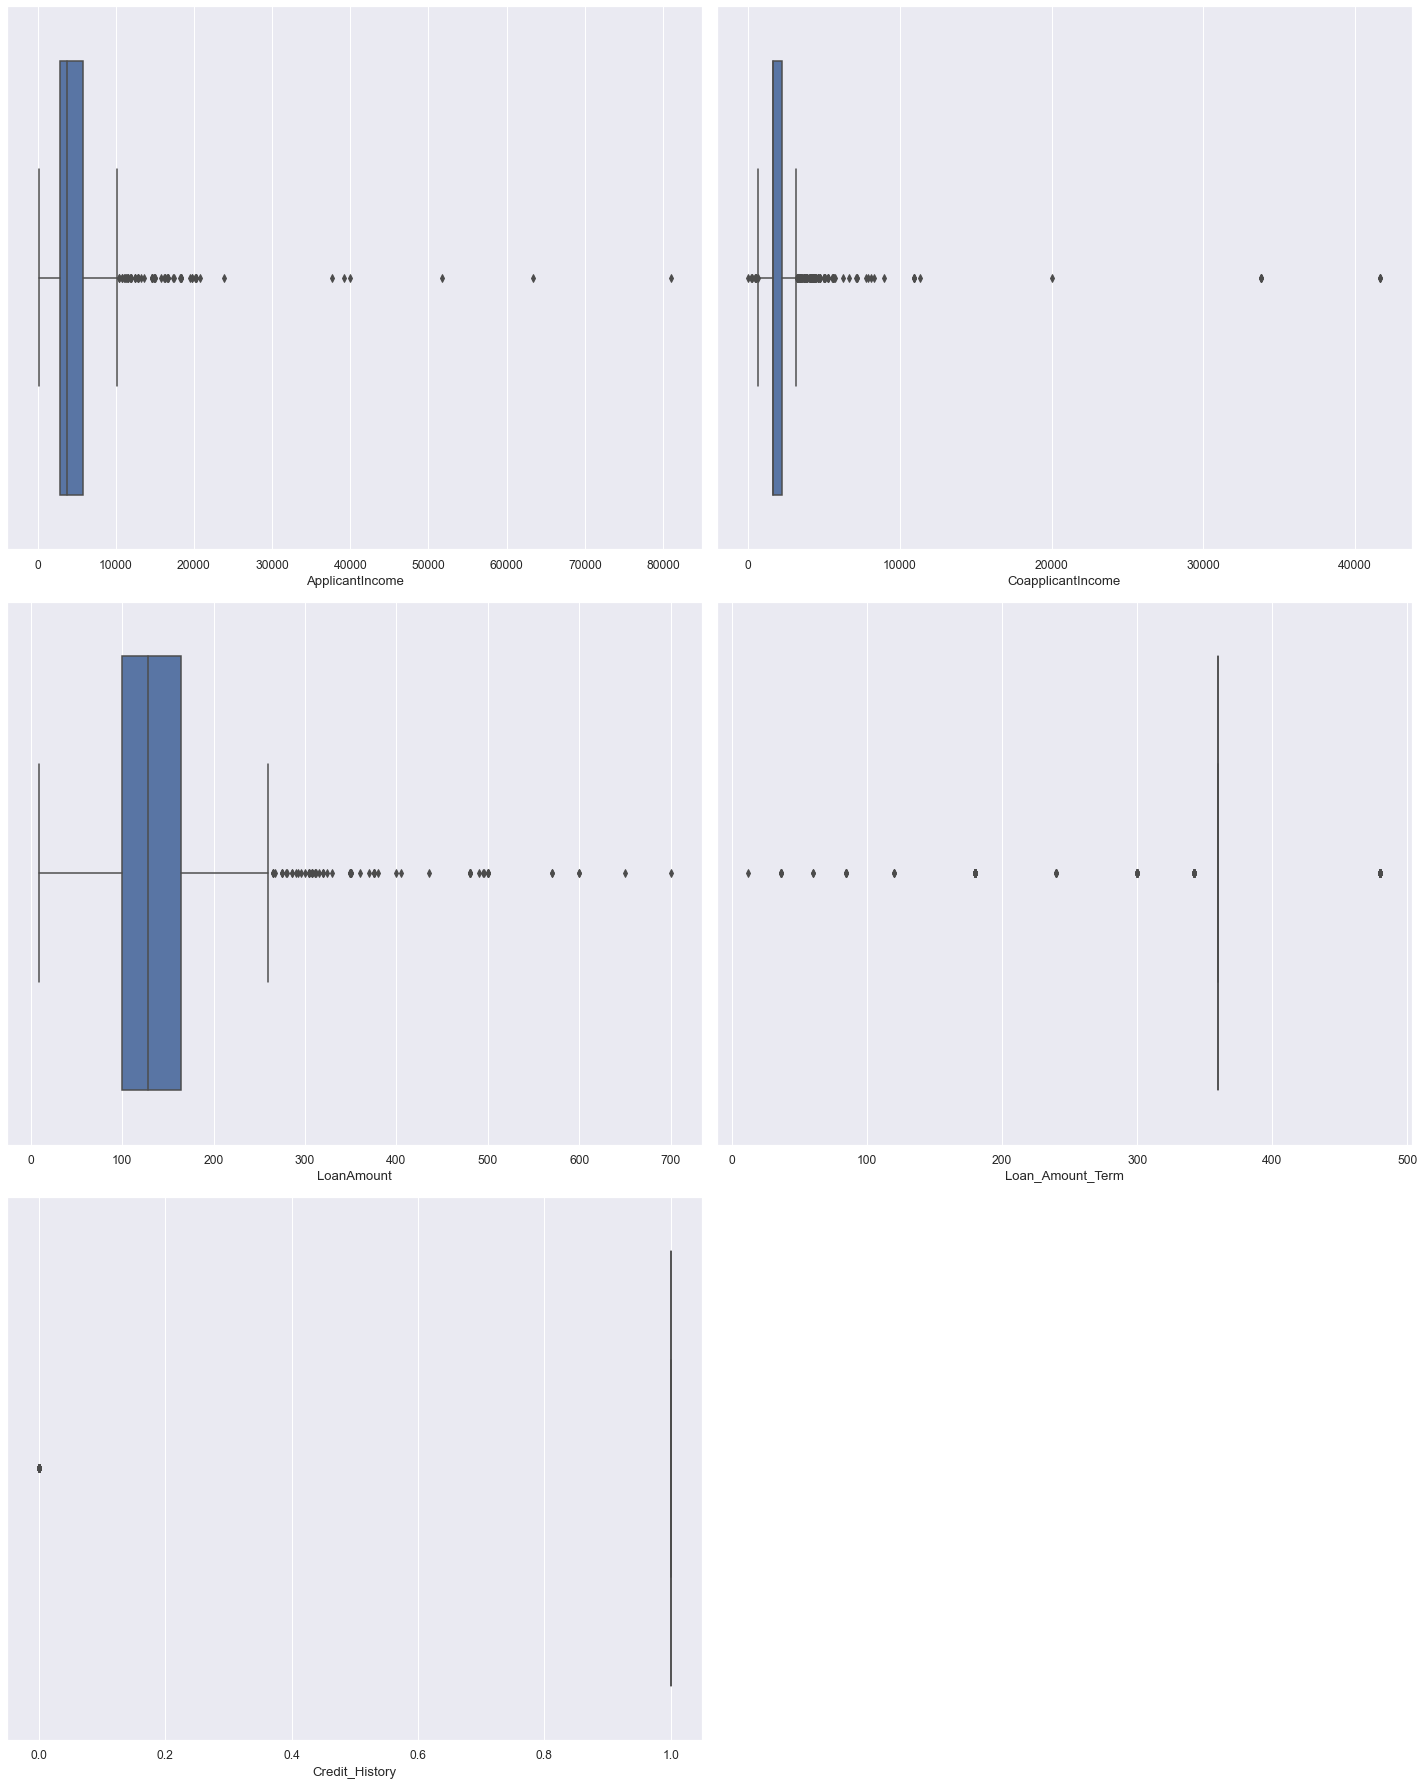

In [496]:
plt.figure(figsize=(20,25),facecolor="white")
plotnumber=1
for column in numeric_feat:
    if plotnumber <=5:
        ax=plt.subplot(3,2,plotnumber)
        sns.boxplot(df[column])
    plotnumber+=1
plt.tight_layout()

# 13. Checking Skewness

In [497]:
numeric_df=df[numeric_feat]

In [498]:
numeric_df.skew()

ApplicantIncome      6.707404
CoapplicantIncome    8.710225
LoanAmount           2.489224
Loan_Amount_Term    -2.318066
Credit_History      -1.302436
dtype: float64

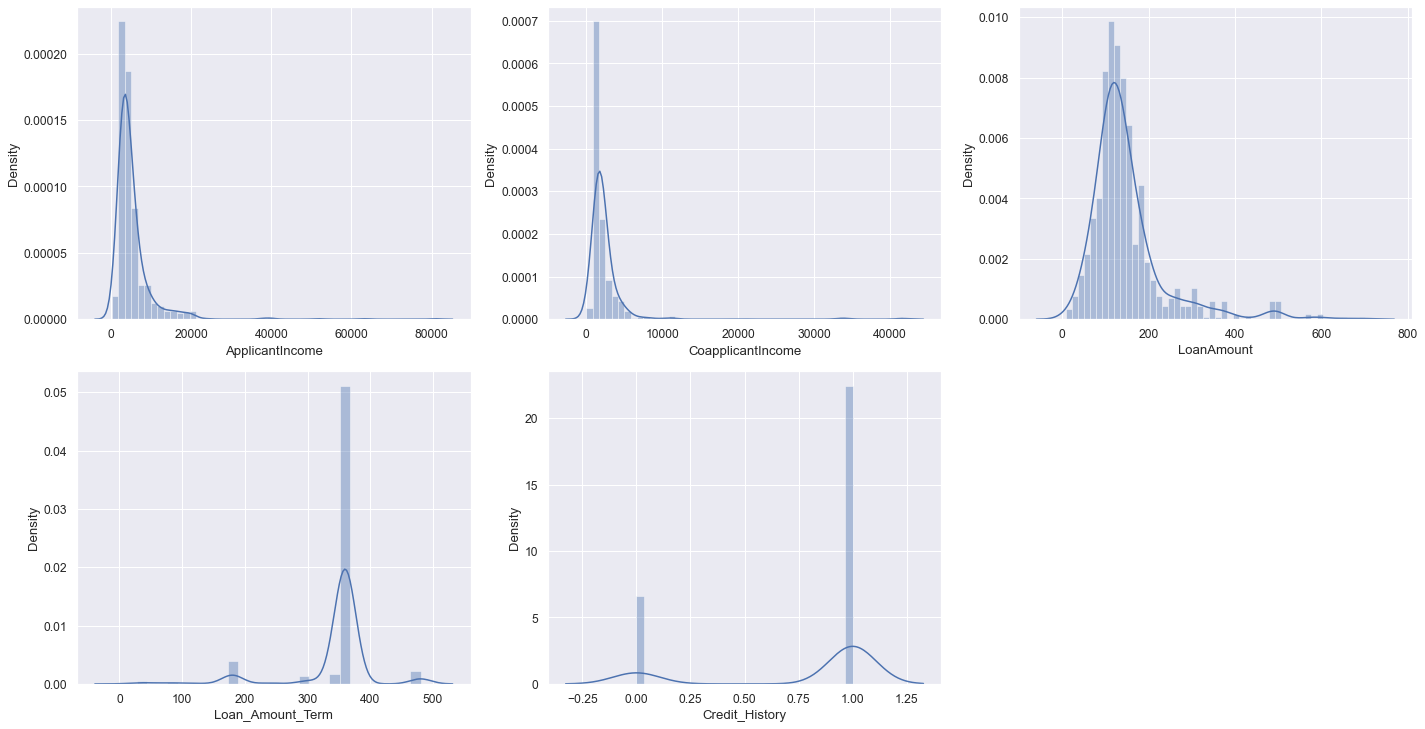

In [499]:
plt.figure(figsize=(20,25),facecolor="white")
plotnumber=1
for column in df[numeric_feat]:
    if plotnumber <=15:
        ax=plt.subplot(5,3,plotnumber)
        sns.distplot(df[column])
    plotnumber+=1
plt.tight_layout()

# 14. Dealing with Outliers with Zscore techinque

## 14.1 Dealing with ApplicantIncome

<AxesSubplot:xlabel='ApplicantIncome'>

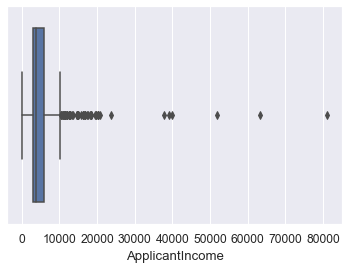

In [500]:
sns.boxplot(df["ApplicantIncome"])

In [501]:
upper_limit=df["ApplicantIncome"].mean()+3*df["ApplicantIncome"].std()
lower_limit=df["ApplicantIncome"].mean()-3*df["ApplicantIncome"].std()

df["ApplicantIncome"]=np.where(df["ApplicantIncome"]>upper_limit,
                        upper_limit,
                       np.where(
                           df["ApplicantIncome"]<lower_limit,
                           lower_limit,
                           df["ApplicantIncome"]
                        )
                    )

<AxesSubplot:xlabel='ApplicantIncome'>

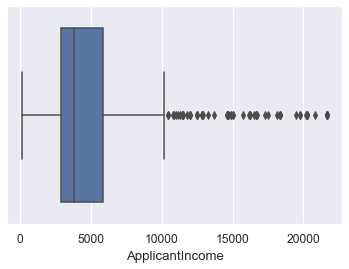

In [502]:
sns.boxplot(df["ApplicantIncome"])

### 14.2 Dealing with CoapplicantIncome

<AxesSubplot:xlabel='CoapplicantIncome'>

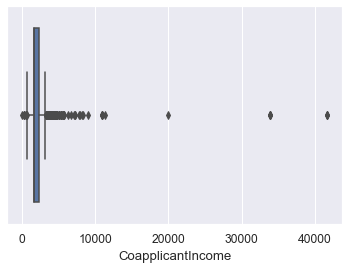

In [503]:
sns.boxplot(df["CoapplicantIncome"])

In [504]:
upper_limit=df["CoapplicantIncome"].mean()+3*df["CoapplicantIncome"].std()
lower_limit=df["CoapplicantIncome"].mean()-3*df["CoapplicantIncome"].std()

df["CoapplicantIncome"]=np.where(df["CoapplicantIncome"]>upper_limit,
                        upper_limit,
                       np.where(
                           df["CoapplicantIncome"]<lower_limit,
                           lower_limit,
                           df["CoapplicantIncome"]
                        )
                    )

<AxesSubplot:xlabel='CoapplicantIncome'>

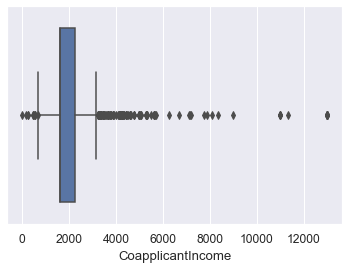

In [505]:
sns.boxplot(df["CoapplicantIncome"])

### 14.3 Dealing with Loan Amount

<AxesSubplot:xlabel='LoanAmount'>

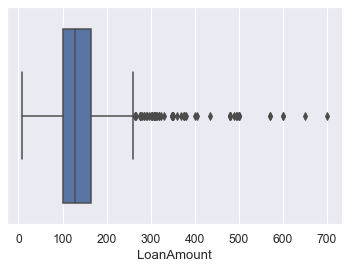

In [506]:
sns.boxplot(df["LoanAmount"])

In [507]:
upper_limit=df["LoanAmount"].mean()+3*df["LoanAmount"].std()
lower_limit=df["LoanAmount"].mean()-3*df["LoanAmount"].std()

df["LoanAmount"]=np.where(df["LoanAmount"]>upper_limit,
                        upper_limit,
                       np.where(
                           df["LoanAmount"]<lower_limit,
                           lower_limit,
                           df["LoanAmount"]
                        )
                    )

<AxesSubplot:xlabel='LoanAmount'>

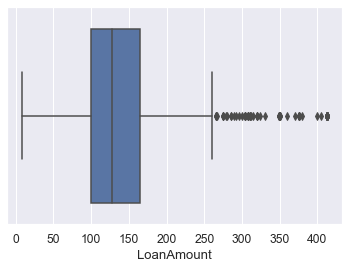

In [508]:
sns.boxplot(df["LoanAmount"])

# 14 Dealing skeweness 

In [509]:
numeric_df.skew()

ApplicantIncome      6.707404
CoapplicantIncome    8.710225
LoanAmount           2.489224
Loan_Amount_Term    -2.318066
Credit_History      -1.302436
dtype: float64

In [510]:
print(df["ApplicantIncome"].skew())
print(df["CoapplicantIncome"].skew())
print(df["LoanAmount"].skew())
print(df["Loan_Amount_Term"].skew())
print(df["Credit_History"].skew())

2.376425025073772
4.029296228740495
1.6936915141162272
-2.3180658738269924
-1.3024358403223146


**As we can see after outlier treating also still the right skewness is there so we will apply log transform.**

In [511]:
for col in df.columns[5:10]:
    if df.skew().loc[col]>0.55:
        df[col]=np.log1p(df[col])

In [512]:
print(df["ApplicantIncome"].skew())
print(df["CoapplicantIncome"].skew())
print(df["LoanAmount"].skew())
print(df["Loan_Amount_Term"].skew())
print(df["Credit_History"].skew())

0.10100917691999302
-0.14102435191304205
-0.47797638389494457
-2.3180658738269924
-1.3024358403223146


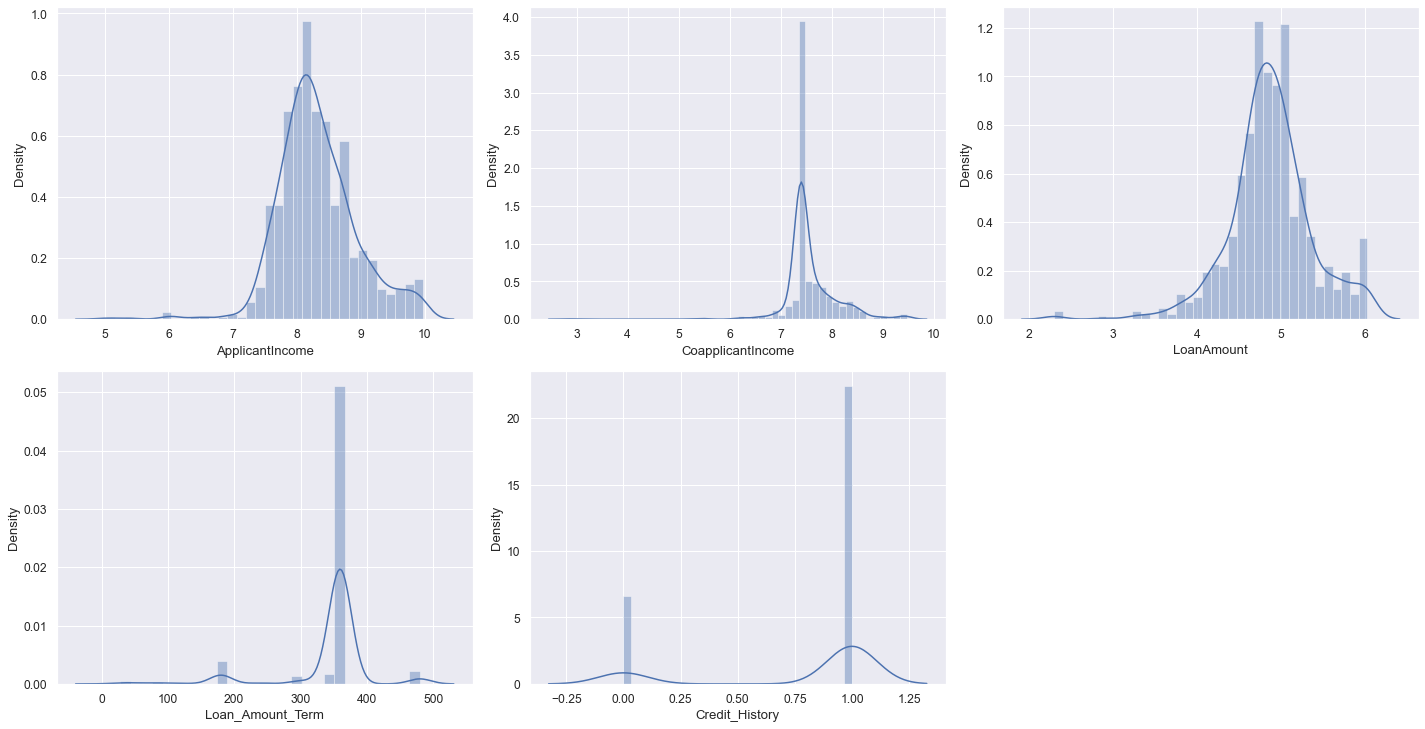

In [513]:
plt.figure(figsize=(20,25),facecolor="white")
plotnumber=1
for column in df[numeric_feat]:
    if plotnumber <=15:
        ax=plt.subplot(5,3,plotnumber)
        sns.distplot(df[column])
    plotnumber+=1
plt.tight_layout()

**After applying log transformation we can see now is better than before.**

# 15. Checking the correlation

In [514]:
df.corr()["Loan_Status"]

Gender                    -0.015300
Married                   -0.105615
Dependents                 0.003552
Education                 -0.105521
Self_Employed              0.032577
ApplicantIncome           -0.019849
CoapplicantIncome          0.064750
LoanAmount                 0.044515
Loan_Amount_Term           0.051657
Credit_History            -0.503090
Loan_Status                1.000000
Property_Area_Semiurban    0.119744
Property_Area_Urban       -0.135845
Property_Area_Rural        0.020243
Name: Loan_Status, dtype: float64

# 16.Split Train and test dataset

In [515]:
x=df.drop("Loan_Status",axis=1)

In [516]:
y=df.Loan_Status

# 17. Applying Standard Scaler for Feature Scaling

In [517]:
from sklearn.preprocessing import StandardScaler

In [518]:
scaler=StandardScaler()

In [519]:
x_scaled=scaler.fit_transform(x)

# 18. Checking Multicollinearity

In [520]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [521]:
vif=pd.DataFrame()

In [522]:
vif["VIF"]=[variance_inflation_factor(x_scaled,i)for i in range(x_scaled.shape[1])]

In [523]:
vif["Feature"]=x.columns

In [524]:
vif

,VIF,Feature
0,1.240548,Gender
1,1.348317,Married
2,1.160622,Dependents
3,1.086509,Education
4,1.045906,Self_Employed
5,1.540090,ApplicantIncome
6,1.235573,CoapplicantIncome
7,1.681380,LoanAmount
8,1.056829,Loan_Amount_Term
9,1.027651,Credit_History


**As we can see that there are no muliticollineary issue with any features.**

# Model Building

# 19.1 Logistic Regression

In [525]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [526]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.30,random_state=101)

In [527]:
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score,classification_report

In [528]:
lr=LogisticRegression()

## 19.2 Choosing Best Random State

In [529]:
for i in range(0,500):
    x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.30,random_state=i)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    
    if round(accuracy_score(y_train,pred_train)*100,1)==round(accuracy_score(y_test,pred_test)*100,1):
        print("At random state",i,"Model perfrom well")
        print("At random state",i)
        print("Training accuracy score is-",accuracy_score(y_train,pred_train)*100)
        print("Testing accuracy score is-",accuracy_score(y_test,pred_test)*100)
   

At random state 14 Model perfrom well
At random state 14
Training accuracy score is- 73.5593220338983
Testing accuracy score is- 73.62204724409449
At random state 44 Model perfrom well
At random state 44
Training accuracy score is- 72.03389830508475
Testing accuracy score is- 72.04724409448819
At random state 61 Model perfrom well
At random state 61
Training accuracy score is- 73.5593220338983
Testing accuracy score is- 73.62204724409449
At random state 70 Model perfrom well
At random state 70
Training accuracy score is- 73.5593220338983
Testing accuracy score is- 73.62204724409449
At random state 74 Model perfrom well
At random state 74
Training accuracy score is- 73.22033898305085
Testing accuracy score is- 73.22834645669292
At random state 125 Model perfrom well
At random state 125
Training accuracy score is- 71.69491525423729
Testing accuracy score is- 71.65354330708661
At random state 178 Model perfrom well
At random state 178
Training accuracy score is- 72.37288135593221
Testing 

**We can choose random state 356.**

In [590]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.30,random_state=356)

In [591]:
lr=LogisticRegression()

In [592]:
lr.fit(x_train,y_train)

LogisticRegression()

## 19.3 Evaluation Matrix

In [593]:
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score,classification_report,plot_confusion_matrix

In [594]:
y_pred=lr.predict(x_test)

In [595]:
lr_acc_score=accuracy_score(y_test,y_pred)

In [596]:
lr_acc_score

0.7322834645669292

In [597]:
confusion_matrix(y_test,y_pred)

array([[98, 15],
       [53, 88]], dtype=int64)

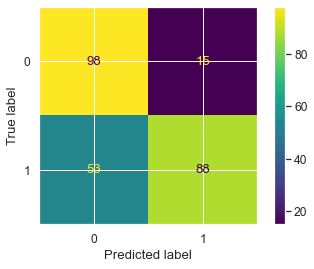

In [598]:
plot_confusion_matrix(lr,x_test,y_test,values_format=".4g")

In [599]:
print(classification_report(y_test,y_pred,digits=2))

              precision    recall  f1-score   support

           0       0.65      0.87      0.74       113
           1       0.85      0.62      0.72       141

    accuracy                           0.73       254
   macro avg       0.75      0.75      0.73       254
weighted avg       0.76      0.73      0.73       254



## 19.4 Finding Best CV for model

In [600]:
from sklearn.model_selection import cross_val_score,cross_validate

In [601]:
for j in range(2,12):
    lr_score=cross_val_score(lr,x_scaled,y,cv=j)
    lr_s=lr_score.mean()
    print("At CV:-",j)
    print("Cross validation score is:",lr_score*100)
    print("Accuracy Score:",lr_s*100)
    print('\n')

At CV:- 2
Cross validation score is: [72.74881517 69.90521327]
Accuracy Score: 71.32701421800948


At CV:- 3
Cross validation score is: [72.34042553 69.39501779 69.75088968]
Accuracy Score: 70.49544433507484


At CV:- 4
Cross validation score is: [72.03791469 66.82464455 72.98578199 72.98578199]
Accuracy Score: 71.2085308056872


At CV:- 5
Cross validation score is: [72.78106509 68.04733728 71.59763314 73.37278107 70.83333333]
Accuracy Score: 71.32642998027615


At CV:- 6
Cross validation score is: [70.21276596 70.21276596 63.82978723 75.17730496 71.42857143 73.57142857]
Accuracy Score: 70.7387706855792


At CV:- 7
Cross validation score is: [67.76859504 73.55371901 67.76859504 71.07438017 73.33333333 69.16666667
 73.33333333]
Accuracy Score: 70.8569460842188


At CV:- 8
Cross validation score is: [69.81132075 72.64150943 68.86792453 63.20754717 76.19047619 69.52380952
 71.42857143 77.14285714]
Accuracy Score: 71.10175202156334


At CV:- 9
Cross validation score is: [68.08510638 74.468

**We can choose best cv 9.**

In [602]:
cross_val_score(lr,x_scaled,y,cv=9)

array([0.68085106, 0.74468085, 0.70212766, 0.64893617, 0.70212766,
       0.77659574, 0.70212766, 0.70967742, 0.76344086])

In [606]:
lr_cv_score=cross_val_score(lr,x_scaled,y,cv=9).mean()

In [607]:
lr_cv_score

0.7145072320089478

In [608]:
lr_acc_score

0.7322834645669292

# 20.1 KNN Classifier

In [609]:
from sklearn.neighbors import KNeighborsClassifier

In [610]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.30,random_state=356)

In [611]:
knn=KNeighborsClassifier()

In [612]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

## 20.2 Evaluation Matrix

In [613]:
y_pred=knn.predict(x_test)

In [614]:
knn_acc_score=accuracy_score(y_test,y_pred)

In [615]:
knn_acc_score

0.6889763779527559

In [616]:
confusion_matrix(y_test,y_pred)

array([[87, 26],
       [53, 88]], dtype=int64)

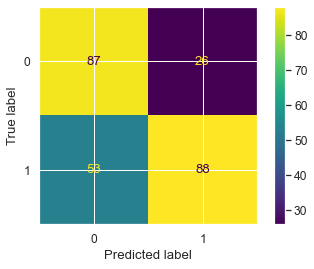

In [617]:
plot_confusion_matrix(knn,x_test,y_test,values_format=".4g")

In [618]:
print(classification_report(y_test,y_pred,digits=2))

              precision    recall  f1-score   support

           0       0.62      0.77      0.69       113
           1       0.77      0.62      0.69       141

    accuracy                           0.69       254
   macro avg       0.70      0.70      0.69       254
weighted avg       0.70      0.69      0.69       254



## 20.3 Finding Best CV for model

In [619]:
for j in range(2,12):
    knn_score=cross_val_score(knn,x_scaled,y,cv=j)
    knn_s=knn_score.mean()
    print("At CV:-",j)
    print("Cross validation score is:",knn_score*100)
    print("Accuracy Score:",knn_s*100)
    print('\n')

At CV:- 2
Cross validation score is: [68.48341232 70.61611374]
Accuracy Score: 69.54976303317535


At CV:- 3
Cross validation score is: [68.79432624 75.08896797 69.75088968]
Accuracy Score: 71.21139463079344


At CV:- 4
Cross validation score is: [69.66824645 75.82938389 72.98578199 72.51184834]
Accuracy Score: 72.74881516587678


At CV:- 5
Cross validation score is: [69.82248521 70.41420118 76.33136095 76.33136095 70.83333333]
Accuracy Score: 72.7465483234714


At CV:- 6
Cross validation score is: [73.04964539 75.17730496 75.17730496 76.59574468 77.14285714 72.85714286]
Accuracy Score: 75.0


At CV:- 7
Cross validation score is: [71.90082645 76.03305785 74.38016529 74.38016529 73.33333333 72.5
 75.        ]
Accuracy Score: 73.93250688705234


At CV:- 8
Cross validation score is: [71.69811321 71.69811321 79.24528302 75.47169811 71.42857143 76.19047619
 78.0952381  75.23809524]
Accuracy Score: 74.88319856244384


At CV:- 9
Cross validation score is: [72.34042553 74.46808511 76.59574468 

**We can choose best CV 10**

In [620]:
cross_val_score(knn,x_scaled,y,cv=10)

array([0.71764706, 0.77647059, 0.75294118, 0.77647059, 0.80952381,
       0.69047619, 0.79761905, 0.73809524, 0.73809524, 0.76190476])

In [621]:
knn_cv_score=cross_val_score(knn,x_scaled,y,cv=10).mean()
knn_cv_score

0.7559243697478991

In [622]:
knn_acc_score

0.6889763779527559

# 21.1 Random Forest Classifier

In [623]:
from sklearn.ensemble import RandomForestClassifier

In [624]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.30,random_state=356)

In [625]:
rfc=RandomForestClassifier()

In [626]:
rfc.fit(x_train,y_train)

RandomForestClassifier()

# 21.2 Evaluation Matrix

In [627]:
y_pred=rfc.predict(x_test)

In [628]:
rfc_acc_score=accuracy_score(y_test,y_pred)

In [629]:
rfc_acc_score

0.8858267716535433

In [630]:
confusion_matrix(y_test,y_pred)

array([[ 99,  14],
       [ 15, 126]], dtype=int64)

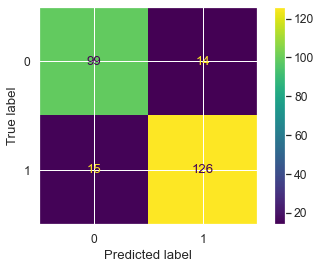

In [631]:
plot_confusion_matrix(rfc,x_test,y_test,values_format=".4g")

In [632]:
print(classification_report(y_test,y_pred,digits=2))

              precision    recall  f1-score   support

           0       0.87      0.88      0.87       113
           1       0.90      0.89      0.90       141

    accuracy                           0.89       254
   macro avg       0.88      0.88      0.88       254
weighted avg       0.89      0.89      0.89       254



## 21.3 Finding Best CV for model

In [633]:
for j in range(2,12):
    rfc_score=cross_val_score(rfc,x_scaled,y,cv=j)
    rfc_s=rfc_score.mean()
    print("At CV:-",j)
    print("Cross validation score is:",rfc_score*100)
    print("Accuracy Score:",rfc_s*100)
    print('\n')

At CV:- 2
Cross validation score is: [83.88625592 84.36018957]
Accuracy Score: 84.12322274881517


At CV:- 3
Cross validation score is: [87.58865248 90.03558719 87.54448399]
Accuracy Score: 88.38957455221558


At CV:- 4
Cross validation score is: [85.78199052 90.52132701 87.20379147 89.09952607]
Accuracy Score: 88.15165876777252


At CV:- 5
Cross validation score is: [90.53254438 94.08284024 92.30769231 91.12426036 92.85714286]
Accuracy Score: 92.18089602704987


At CV:- 6
Cross validation score is: [92.19858156 90.78014184 90.78014184 91.4893617  90.71428571 95.        ]
Accuracy Score: 91.82708544410673


At CV:- 7
Cross validation score is: [91.73553719 89.25619835 90.90909091 92.56198347 86.66666667 88.33333333
 93.33333333]
Accuracy Score: 90.39944903581268


At CV:- 8
Cross validation score is: [93.39622642 86.79245283 95.28301887 90.56603774 91.42857143 90.47619048
 91.42857143 93.33333333]
Accuracy Score: 91.58805031446542


At CV:- 9
Cross validation score is: [92.55319149 91.

**We can choose cv 5.**

In [635]:
cross_val_score(rfc,x_scaled,y,cv=5)

array([0.90532544, 0.9408284 , 0.90532544, 0.89940828, 0.89880952])

In [636]:
rfc_cv_score=cross_val_score(rfc,x_scaled,y,cv=5).mean()

In [637]:
rfc_cv_score

0.9099394195548042

In [638]:
rfc_acc_score

0.8858267716535433

# 22.1 Gradient Boosting Classifier

In [639]:
from sklearn.ensemble import GradientBoostingClassifier

In [640]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.30,random_state=356)

In [641]:
gbc=GradientBoostingClassifier()

In [642]:
gbc.fit(x_train,y_train)

GradientBoostingClassifier()

## 22.2 Evaluation Martix

In [643]:
y_pred=gbc.predict(x_test)

In [644]:
accuracy_score(y_test,y_pred)

0.8031496062992126

In [645]:
gbc_acc_score=accuracy_score(y_test,y_pred)

In [646]:
gbc_acc_score

0.8031496062992126

In [647]:
confusion_matrix(y_test,y_pred)

array([[100,  13],
       [ 37, 104]], dtype=int64)

In [648]:
print(classification_report(y_test,y_pred,digits=2))

              precision    recall  f1-score   support

           0       0.73      0.88      0.80       113
           1       0.89      0.74      0.81       141

    accuracy                           0.80       254
   macro avg       0.81      0.81      0.80       254
weighted avg       0.82      0.80      0.80       254



## 22.3 Finding Best CV for model

In [649]:
for j in range(2,12):
    gbc_score=cross_val_score(gbc,x_scaled,y,cv=j)
    gbc_s=gbc_score.mean()
    print("At CV:-",j)
    print("Cross validation score is:",gbc_score*100)
    print("Accuracy Score:",gbc_s*100)
    print('\n')

At CV:- 2
Cross validation score is: [78.43601896 78.90995261]
Accuracy Score: 78.67298578199052


At CV:- 3
Cross validation score is: [80.14184397 79.00355872 81.85053381]
Accuracy Score: 80.33197883277387


At CV:- 4
Cross validation score is: [81.04265403 80.56872038 78.19905213 86.25592417]
Accuracy Score: 81.51658767772511


At CV:- 5
Cross validation score is: [83.43195266 78.10650888 81.65680473 75.14792899 83.33333333]
Accuracy Score: 80.3353057199211


At CV:- 6
Cross validation score is: [82.26950355 83.68794326 75.17730496 84.39716312 78.57142857 83.57142857]
Accuracy Score: 81.27912867274568


At CV:- 7
Cross validation score is: [81.81818182 82.6446281  78.51239669 81.81818182 76.66666667 84.16666667
 82.5       ]
Accuracy Score: 81.16096025186935


At CV:- 8
Cross validation score is: [83.01886792 77.35849057 82.0754717  77.35849057 83.80952381 74.28571429
 83.80952381 80.95238095]
Accuracy Score: 80.33355795148248


At CV:- 9
Cross validation score is: [79.78723404 81.9

**We can choose best cv 11.**

In [650]:
cross_val_score(gbc,x_scaled,y,cv=11)

array([0.80519481, 0.8961039 , 0.77922078, 0.83116883, 0.72727273,
       0.84415584, 0.79220779, 0.79220779, 0.82894737, 0.80263158,
       0.86842105])

In [651]:
gbc_cv_score=cross_val_score(gbc,x_scaled,y,cv=11).mean()

In [652]:
gbc_cv_score

0.8140495867768596

In [653]:
gbc_acc_score

0.8031496062992126

# 23.1 Decision Tree Classifier

In [698]:
from sklearn.tree import DecisionTreeClassifier

In [699]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.30,random_state=356)

In [700]:
dtc=DecisionTreeClassifier()

In [701]:
dtc.fit(x_train,y_train)

DecisionTreeClassifier()

## 23.2 Evaluation Matrix

In [702]:
y_pred=dtc.predict(x_test)

In [703]:
dtc_acc_score=accuracy_score(y_test,y_pred)

In [704]:
dtc_acc_score

0.84251968503937

In [705]:
confusion_matrix(y_test,y_pred)

array([[ 93,  20],
       [ 20, 121]], dtype=int64)

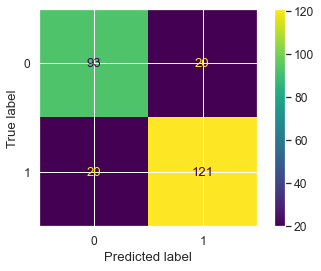

In [706]:
plot_confusion_matrix(dtc,x_test,y_test,values_format=".4g")

In [707]:
print(classification_report(y_test,y_pred,digits=2))

              precision    recall  f1-score   support

           0       0.82      0.82      0.82       113
           1       0.86      0.86      0.86       141

    accuracy                           0.84       254
   macro avg       0.84      0.84      0.84       254
weighted avg       0.84      0.84      0.84       254



## 23.3 Finding Best CV for model

In [664]:
for j in range(2,12):
    dtc_score=cross_val_score(dtc,x_scaled,y,cv=j)
    dtc_s=dtc_score.mean()
    print("At CV:-",j)
    print("Cross validation score is:",dtc_score*100)
    print("Accuracy Score:",dtc_s*100)
    print('\n')

At CV:- 2
Cross validation score is: [81.7535545 80.8056872]
Accuracy Score: 81.27962085308056


At CV:- 3
Cross validation score is: [86.5248227  86.12099644 83.27402135]
Accuracy Score: 85.30661349620992


At CV:- 4
Cross validation score is: [84.36018957 86.72985782 81.99052133 86.25592417]
Accuracy Score: 84.83412322274881


At CV:- 5
Cross validation score is: [85.79881657 90.53254438 87.5739645  83.43195266 82.73809524]
Accuracy Score: 86.01507466892082


At CV:- 6
Cross validation score is: [87.23404255 87.94326241 81.56028369 87.23404255 86.42857143 87.85714286]
Accuracy Score: 86.37622424856467


At CV:- 7
Cross validation score is: [85.95041322 85.95041322 89.25619835 90.90909091 85.83333333 80.
 83.33333333]
Accuracy Score: 85.89039748130656


At CV:- 8
Cross validation score is: [87.73584906 83.01886792 88.67924528 86.79245283 84.76190476 83.80952381
 84.76190476 83.80952381]
Accuracy Score: 85.4211590296496


At CV:- 9
Cross validation score is: [90.42553191 84.04255319 90

**we can choose cv 9.**

In [708]:
cross_val_score(dtc,x_scaled,y,cv=9)

array([0.90425532, 0.84042553, 0.88297872, 0.85106383, 0.90425532,
       0.87234043, 0.86170213, 0.82795699, 0.87096774])

In [709]:
dtc_cv_score=cross_val_score(dtc,x_scaled,y,cv=9).mean()

In [710]:
dtc_cv_score

0.8672564122117999

In [711]:
dtc_acc_score

0.84251968503937

# 24.Lets choose the best model with ROC AUC Curve

In [716]:
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.metrics import plot_roc_curve

In [717]:
lr_pred=lr.predict(x_test)
knn_pred=knn.predict(x_test)
rfc_pred=rfc.predict(x_test)
gbc_pred=gbc.predict(x_test)
dtc_pred=dtc.predict(x_test)

In [718]:
# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, lr_pred, pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, knn_pred, pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(y_test, rfc_pred, pos_label=1)
fpr4, tpr4, thresh4 = roc_curve(y_test, gbc_pred, pos_label=1)
fpr5, tpr5, thresh5 = roc_curve(y_test, dtc_pred, pos_label=1)

In [719]:
# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

In [720]:
# auc scores
auc_score_lr = roc_auc_score(y_test, lr_pred)
auc_score_knn = roc_auc_score(y_test, knn_pred)
auc_score_rfc = roc_auc_score(y_test, rfc_pred)
auc_score_gbc = roc_auc_score(y_test, gbc_pred)
auc_score_dtc = roc_auc_score(y_test, dtc_pred)
print(round(auc_score_lr,2)*100, round(auc_score_knn,2)*100,round(auc_score_rfc,2)*100,round(auc_score_gbc,2)*100,round(auc_score_dtc,2)*100)

75.0 70.0 88.0 81.0 84.0


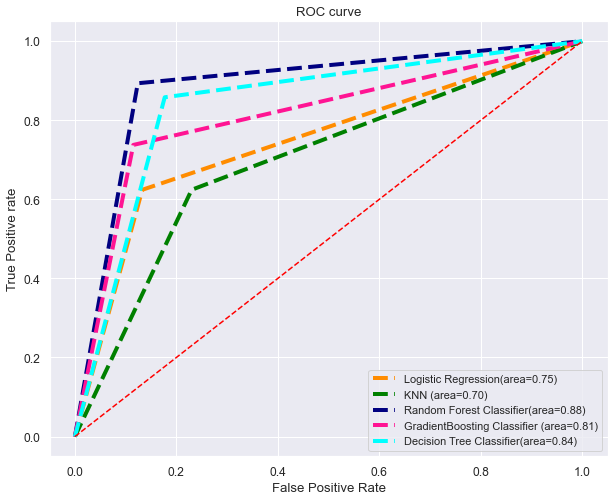

In [721]:
plt.figure(figsize=(10,8))
plt.plot(fpr1, tpr1, linestyle='--',color='darkorange',linewidth= 4, label='Logistic Regression(area=%0.2f)'% auc_score_lr)
plt.plot(fpr2, tpr2, linestyle='--',color='green',linewidth=4, label='KNN (area=%0.2f)'% auc_score_knn)
plt.plot(fpr3,tpr3,linestyle='--',color='navy',linewidth=4, label='Random Forest Classifier(area=%0.2f)'% auc_score_rfc)
plt.plot(fpr4, tpr4, linestyle='--',color='deeppink',linewidth=4, label='GradientBoosting Classifier (area=%0.2f)'% auc_score_gbc)
plt.plot(fpr5,tpr5,linestyle='--',color='aqua',linewidth=4, label='Decision Tree Classifier(area=%0.2f)'% auc_score_dtc)

plt.plot(p_fpr, p_tpr, linestyle='--', color='red')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(prop={'size':11},loc='lower right')
plt.savefig('ROC',dpi=300)
plt.show();

**As we can see from Roc Auc Curve that Random Forest Classifier or Decision Tree Classifier is performing good in the dataset**

# 25.Choosing best model by checking cross validation score

In [722]:
Logistic_Regression={"Accuracy Score":(lr_acc_score,2),
                    "CV Score":(lr_cv_score,2),
                    "Difference":lr_acc_score-lr_cv_score}
Knn={"Accuracy Score":(knn_acc_score,2),
                    "CV Score":(knn_cv_score,2),
                    "Difference":knn_acc_score-knn_cv_score}
Random_Forest_Classifier={"Accuracy Score":(rfc_acc_score,2),
                    "CV Score":(rfc_cv_score,2),
                    "Difference":rfc_acc_score-rfc_cv_score}
Gradient_Boost_Classifier={"Accuracy Score":(gbc_acc_score,2),
                    "CV Score":(gbc_cv_score,2),
                    "Difference":gbc_acc_score-gbc_cv_score}
Decistion_Tree_Classifier={"Accuracy Score":(dtc_acc_score,2),
                    "CV Score":(dtc_cv_score,2),
                    "Difference":dtc_acc_score-dtc_cv_score}


In [723]:
data=np.array([[lr_acc_score,lr_cv_score,lr_acc_score-lr_cv_score],[knn_acc_score,knn_cv_score,knn_acc_score-knn_cv_score],[rfc_acc_score,rfc_cv_score,rfc_acc_score-rfc_cv_score],[gbc_acc_score,gbc_cv_score,gbc_acc_score-gbc_cv_score],[dtc_acc_score,dtc_cv_score,dtc_acc_score-dtc_cv_score]])

In [724]:
index_value=["LogisticRegression","KNeighborsClassifier","RandomForestClassifier","GradientBoostClassifier","DecisionTreeClassifier"]

In [725]:
columns_value=["Accuracy Score","Cross Validation Score","Difference"]

In [726]:
model_selection=pd.DataFrame(data=data,
                            index=index_value,
                            columns=columns_value)

In [727]:
model_selection

,Accuracy Score,Cross Validation Score,Difference
LogisticRegression,0.732283,0.714507,0.017776
KNeighborsClassifier,0.688976,0.755924,-0.066948
RandomForestClassifier,0.885827,0.909939,-0.024113
GradientBoostClassifier,0.803150,0.814050,-0.010900
DecisionTreeClassifier,0.842520,0.867256,-0.024737


**After comparing with CV score , we will select GradientBoost Classifier model for our model,where the model accuracy is good and difference is less in accuracy score and CV score.**

# 26. Hypertuning for our best model ( Gradient Boosting Classifier)

In [732]:
from sklearn.model_selection import GridSearchCV

In [733]:
grid_param={'max_depth':range(2,10,2),
           'learning_rate':np.arange(0.1,1,0.1),
           'min_samples_split':range(2,8,1)}

In [734]:
grid_search=GridSearchCV(gbc,param_grid=grid_param)

In [735]:
grid_search.fit(x_train,y_train)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                         'max_depth': range(2, 10, 2),
                         'min_samples_split': range(2, 8)})

In [736]:
best_parameter=grid_search.best_params_

In [737]:
print(best_parameter)

{'learning_rate': 0.6, 'max_depth': 6, 'min_samples_split': 3}


In [743]:
gbc=GradientBoostingClassifier(max_depth=6,learning_rate=0.6,min_samples_split=6)

In [744]:
gbc.fit(x_train,y_train)

GradientBoostingClassifier(learning_rate=0.6, max_depth=6, min_samples_split=6)

In [745]:
y_pred=gbc.predict(x_test)

In [746]:
gbc_acc_score=accuracy_score(y_test,y_pred)

In [747]:
gbc_acc_score

0.8779527559055118

**we can see after hypertuning GradientBoosting Classifier the model accuracy has increased from 84.25 to 87.79.**

# 27 Performance of Gradient Boosting Classifier after Hypertuning

In [748]:
gbc.fit(x_train,y_train)
pred=gbc.predict(x_train)
gbc_clf_report=pd.DataFrame(classification_report(y_train,pred,output_dict=True))

In [752]:
print("\n*******************Train Result*******************")
print("----------------------------------------------------")

print(f"Accuracy Score:{accuracy_score(y_train,pred)*100:.2f}%")
print("----------------------------------------------------")
print(f"Classification Report:\n{gbc_clf_report}")
print("----------------------------------------------------")
print(f"confusion Matrix:\n{confusion_matrix(y_train,pred)}\n")

pred=gbc.predict(x_test)
clf_report=pd.DataFrame(classification_report(y_test,pred,output_dict=True))
print("\n**********************Test Score******************")

print(f"Accuracy Score:{accuracy_score(y_test,pred)*100:.2f}%")
print("----------------------------------------------------")
print(f"Classification Report:\n{clf_report}")
print("----------------------------------------------------")
print(f"confusion Matrix:\n{confusion_matrix(y_test,pred)}\n")


*******************Train Result*******************
----------------------------------------------------
Accuracy Score:100.00%
----------------------------------------------------
Classification Report:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    309.0  281.0       1.0      590.0         590.0
----------------------------------------------------
confusion Matrix:
[[309   0]
 [  0 281]]


**********************Test Score******************
Accuracy Score:87.80%
----------------------------------------------------
Classification Report:
                    0           1  accuracy   macro avg  weighted avg
precision    0.859649    0.892857  0.877953    0.876253      0.878083
recall       0.867257    0.886525  0.877953    0.876891      0.877953
f1-score     0.863436    0.889680  0.877953   

# 28. Prediction on test data for loan status

In [753]:
gbc.predict(x_test)

array([1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1], dtype=int64)

# 29.Model Saving

In [754]:
import pickle
filename="Loan_prediction.pkl"
pickle.dump(gbc,open(filename,"wb"))